In [1]:
import numpy as np
import matplotlib.pyplot as plt
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
import sys
import os
import pandas as pd

PROJECT_PATH = "G:/Shared drives/visual_encoding"
# REPO_PATH = "C:/Users/User/visual_encoding"
MANIFEST_PATH = "E:/datasets/allen_vc/manifest_files"

sys.path.append("../..")
from allen_vc.epoch_extraction_tools import *

print("Packages Imported")

C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Packages Imported


In [2]:
SESSIONS = ['766640955',
            '767871931',
            '768515987',
            '771160300',
            '771990200',
            '774875821',
            '778240327',
            '778998620',
            '779839471',
            '781842082',
            '786091066',
            '787025148',
            '789848216',
            '793224716',
            '794812542',
            '816200189',
            '821695405',
            '829720705',
            '831882777',
            '835479236',
            '839068429',
            '840012044',
            '847657808']

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
def plot_epochs(signal, time, epochs, epochs_2=None, threshold=None, 
                mark_epochs=True, shade_epochs=True):
    """Plots a signal over time, with annotations for epochs.

    Parameters
    ----------
    signal : numpy array
        Signal to be plotted.
    time : numpy array
        Time stamps for the signal.
    epochs : 2D numpy array
        Epochs to annotate.
    epochs_2 : 2D numpy array, optional
        Second set of epochs to annotate.
    threshold : float, optional
        Horizontal line at given value.
    mark_epochs : bool, optional
        If True, vertical lines are drawn at the start and end of each epoch.
    shade_epochs : bool, optional
        If True, epochs are shaded in green.

    Returns
    -------
    fig, ax : matplotlib Figure, Axes
        Figure and axes for the plot.
    """

    # plot signal
    fig, ax = plt.subplots(figsize=[20,4])
    ax.plot(time, signal, color='k')

    # label plot
    ax.set_xlabel('Time (s)')

    # annotate threshold
    if threshold is not None:
        ax.axhline(threshold, color='k', linestyle='--', linewidth=1)

    # annotate epochs
    if len(epochs) != 0:
        if mark_epochs:
            for t_start in np.array(epochs[:,0]):
                ax.axvline(t_start, color='grey')
            for t_stop in np.array(epochs[:,1]):
                ax.axvline(t_stop, color='k')
        if shade_epochs:
            for t_start, t_stop in epochs:
                ax.axvspan(t_start, t_stop, color='g', alpha=0.2)

    # annotate epochs_2
    if epochs_2 is not None and len(epochs_2) != 0:
        if mark_epochs:
            for t_start in np.array(epochs_2[:,0]):
                ax.axvline(t_start, color='grey', linestyle='--')
            for t_stop in np.array(epochs_2[:,1]):
                ax.axvline(t_stop, color='k', linestyle='--')
        if shade_epochs:
            for t_start, t_stop in epochs_2:
                ax.axvspan(t_start, t_stop, color='b', alpha=0.2)

    return fig, ax

In [5]:
# # Create Allensdk cache object
# cache = EcephysProjectCache.from_warehouse(manifest=f"{MANIFEST_PATH}/manifest.json")

# # load session data
# sessions_all = cache.get_session_table()
# session_ids = sessions_all[sessions_all['session_type']=='functional_connectivity'].index.values

# Running Data

In [6]:
# settings for testing
THRESHOLD = 1
MIN_GAP = 3
MIN_DURATION = 30
RF = 50

Look at epoch distribution for each step of the process.

Find Segments:


Analyzing session: 	766640955
Identified 44 epochs

Above Epochs: 44	Below Epochs: 45


Analyzing session: 	767871931
Identified 22 epochs

Above Epochs: 22	Below Epochs: 22


Analyzing session: 	768515987
Identified 157 epochs

Above Epochs: 157	Below Epochs: 157


Analyzing session: 	771160300
Identified 75 epochs

Above Epochs: 75	Below Epochs: 76


Analyzing session: 	771990200
Identified 47 epochs

Above Epochs: 47	Below Epochs: 48


Analyzing session: 	774875821
Identified 50 epochs

Above Epochs: 50	Below Epochs: 51


Analyzing session: 	778240327
Identified 114 epochs

Above Epochs: 114	Below Epochs: 113


Analyzing session: 	778998620
Identified 14 epochs

Above Epochs: 14	Below Epochs: 14


Analyzing session: 	779839471
Identified 56 epochs

Above Epochs: 56	Below Epochs: 57


Analyzing session: 	781842082
Identified 48 epochs

Above Epochs: 48	Below Epochs: 49


Analyzing session: 	786091066
Identified 2 epochs

Above Epochs: 2	Below Epochs: 1


Analyzing session: 	78702514

C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Analyzing session: 	847657808
Identified 60 epochs

Above Epochs: 60	Below Epochs: 61



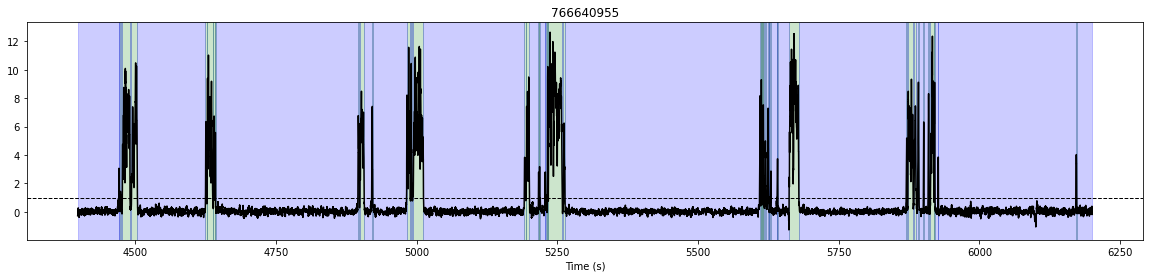

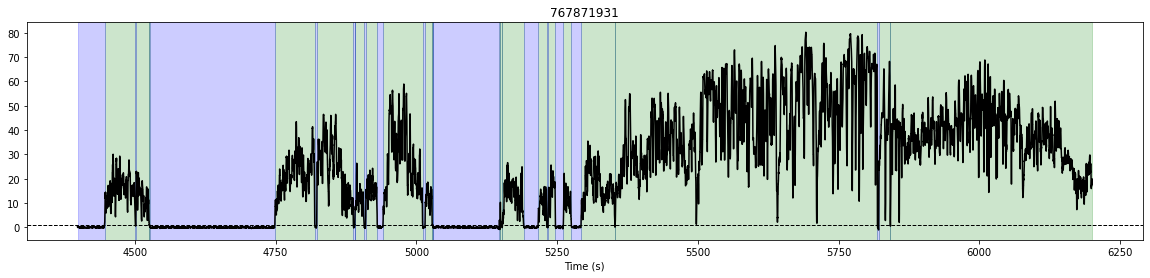

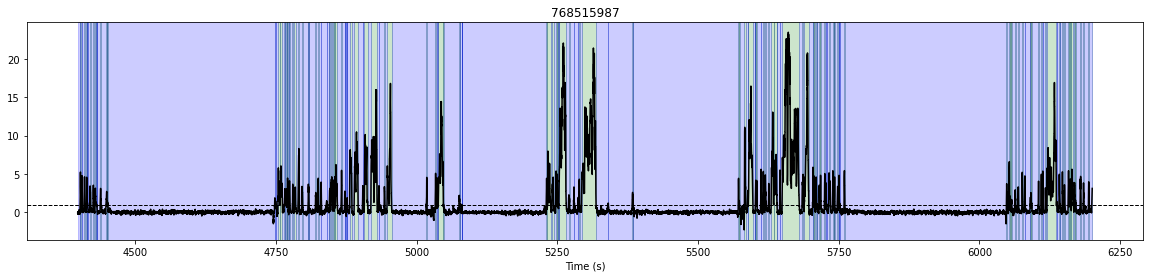

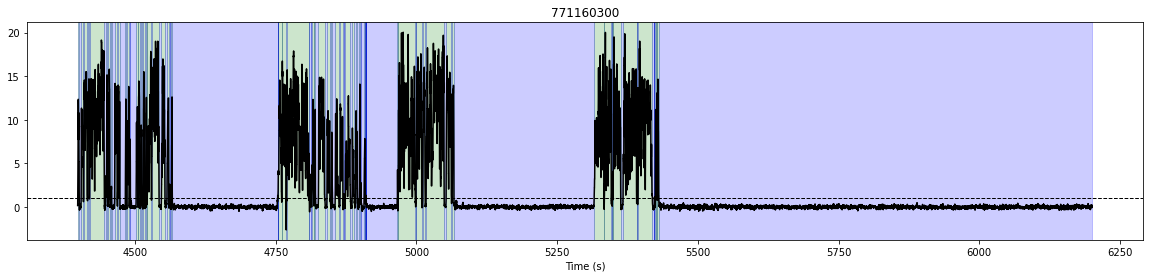

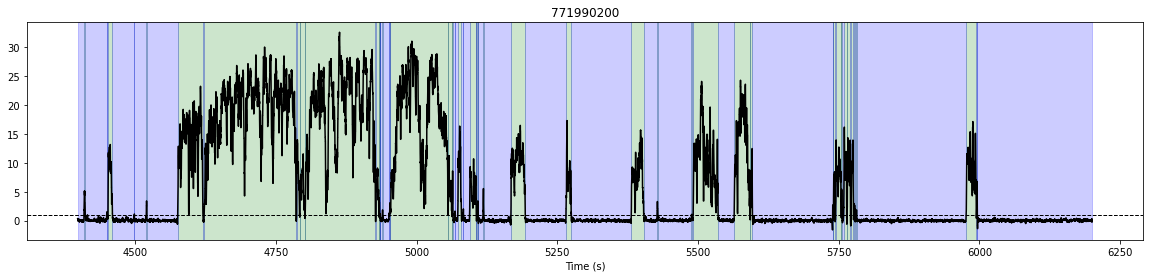

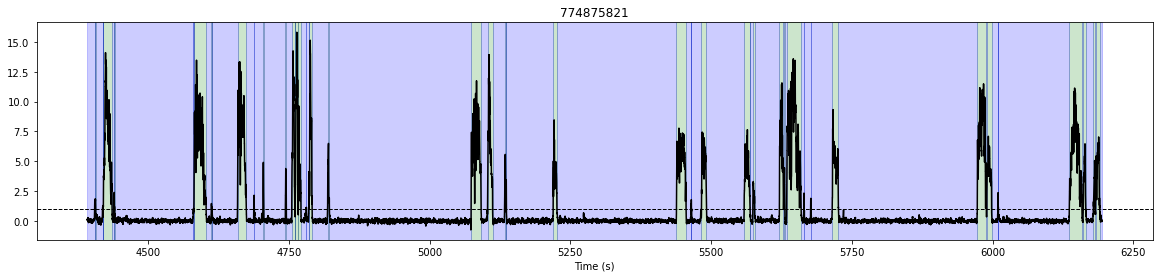

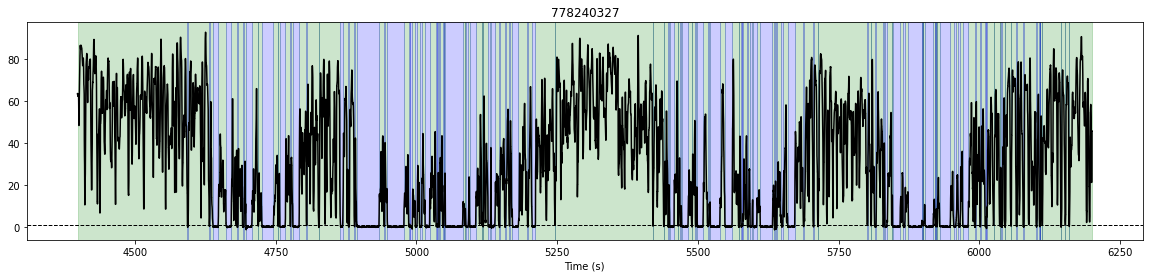

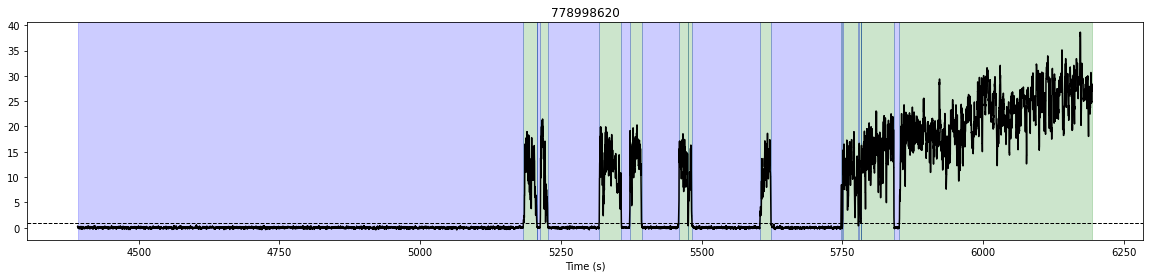

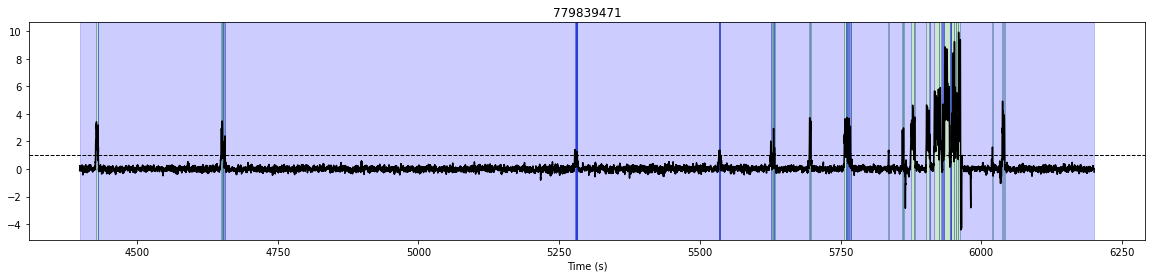

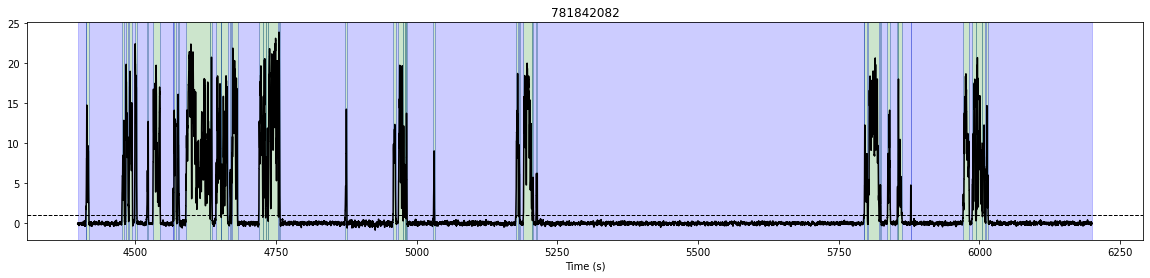

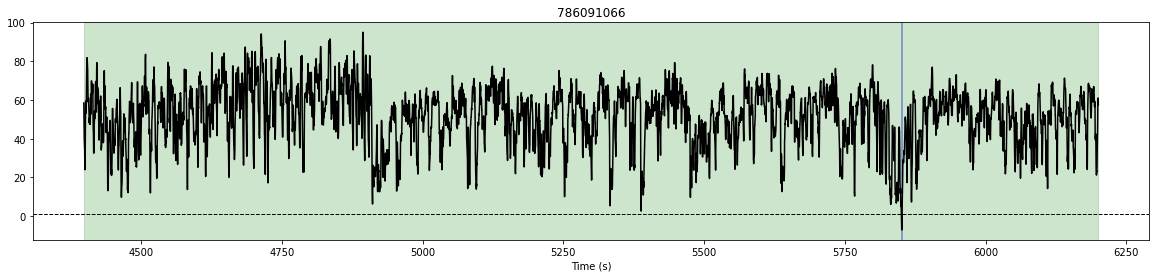

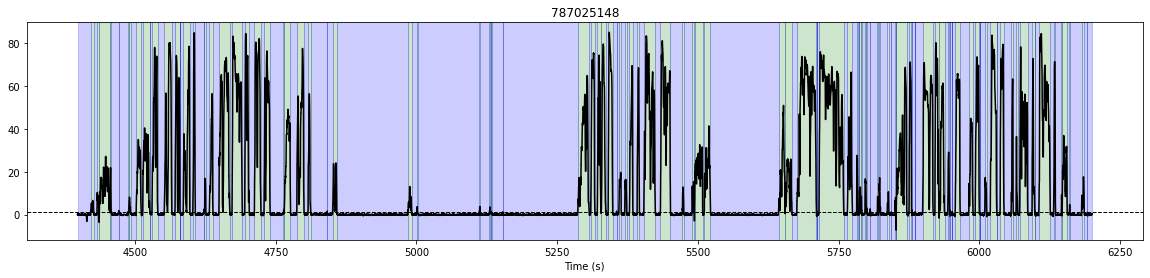

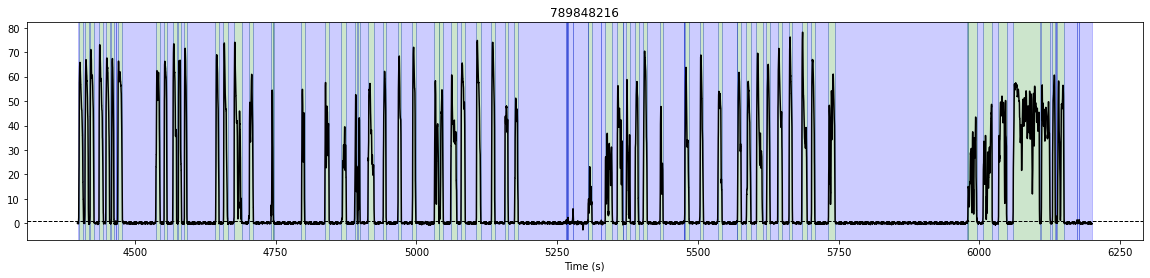

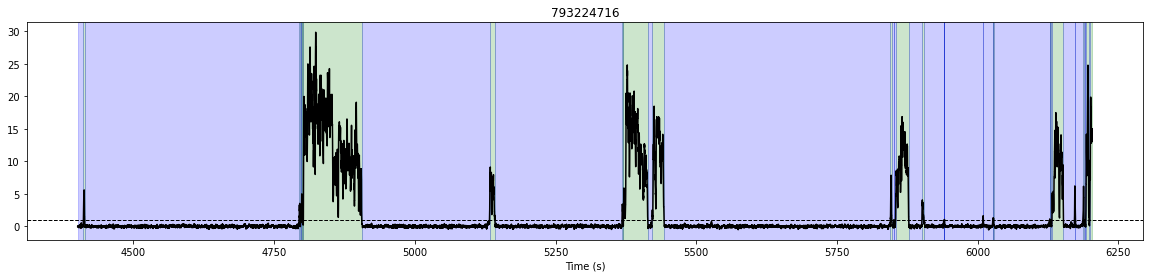

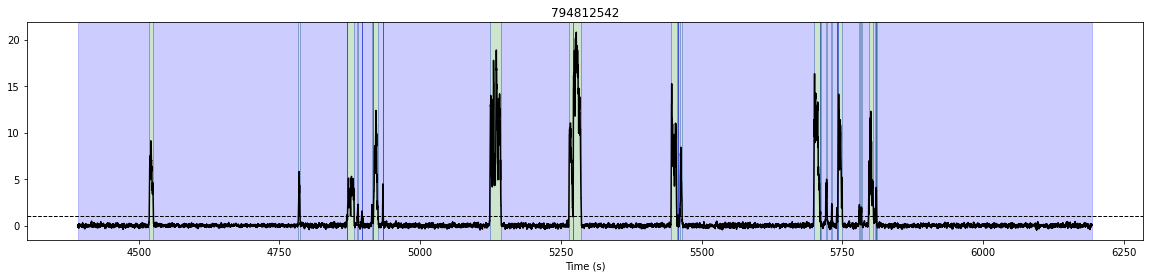

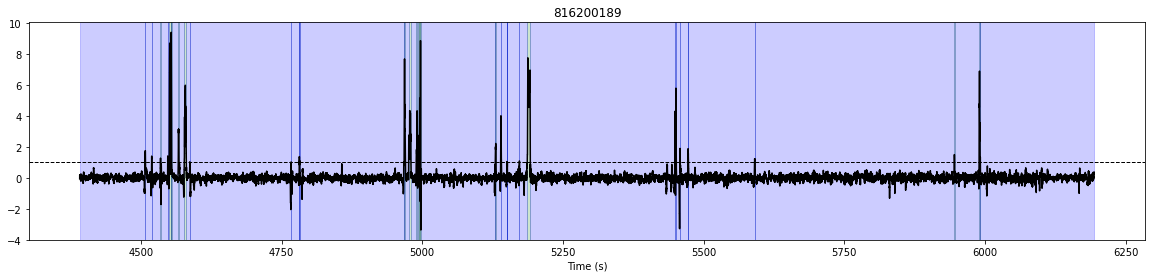

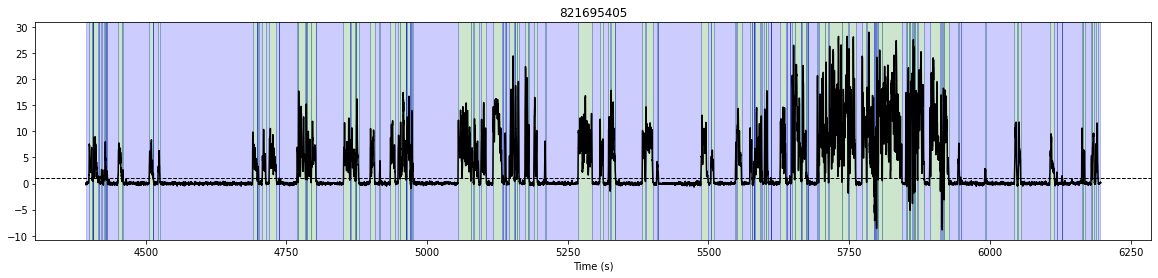

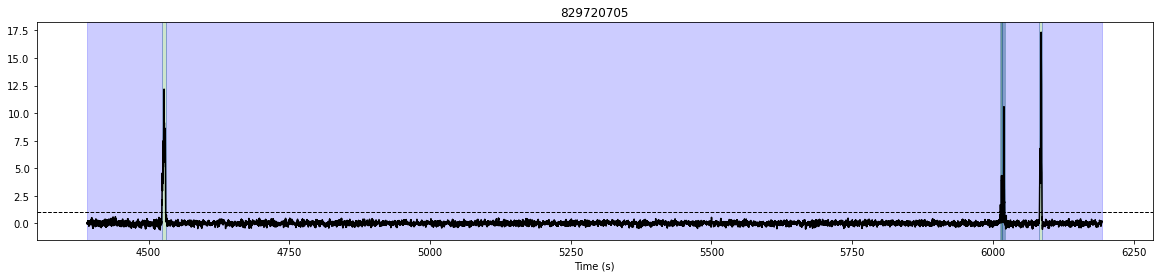

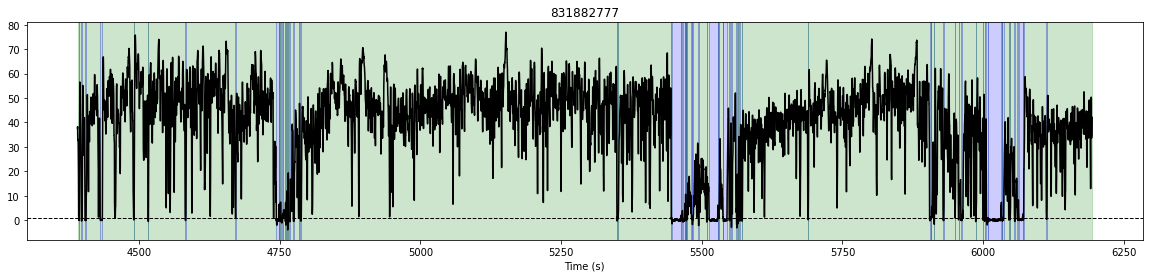

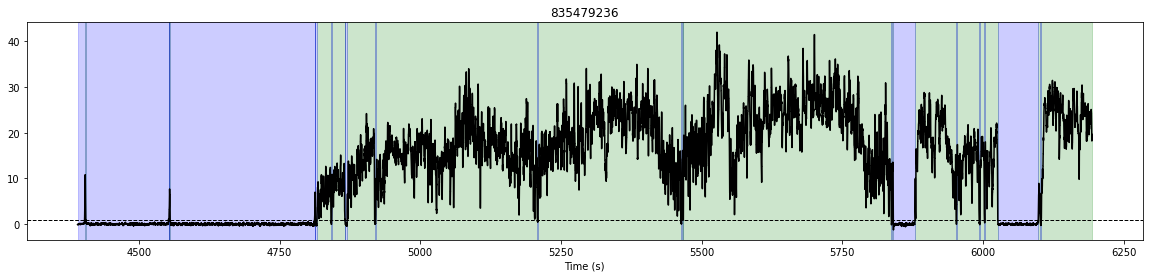

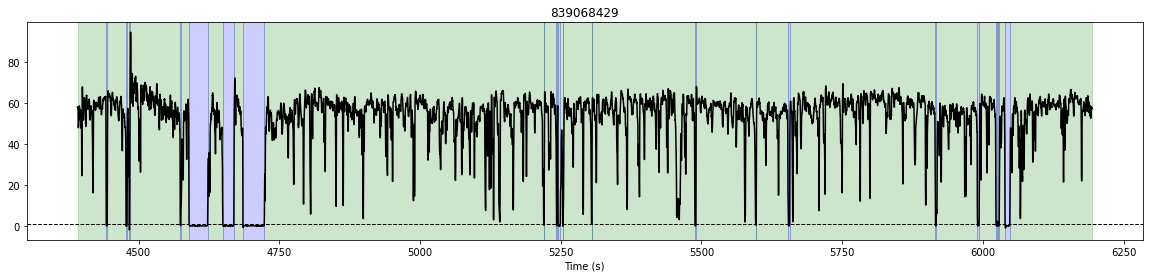

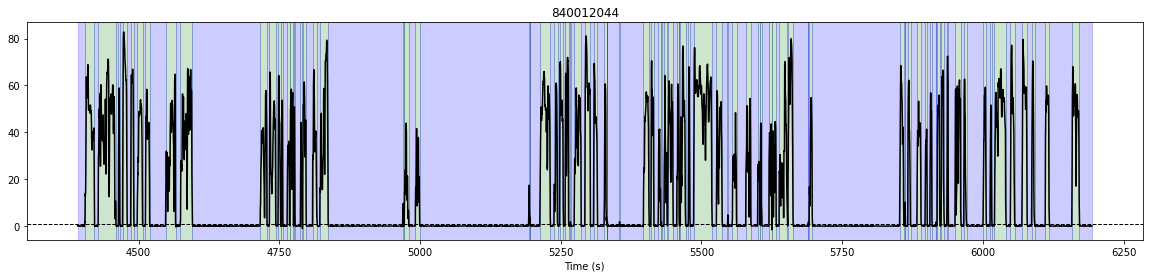

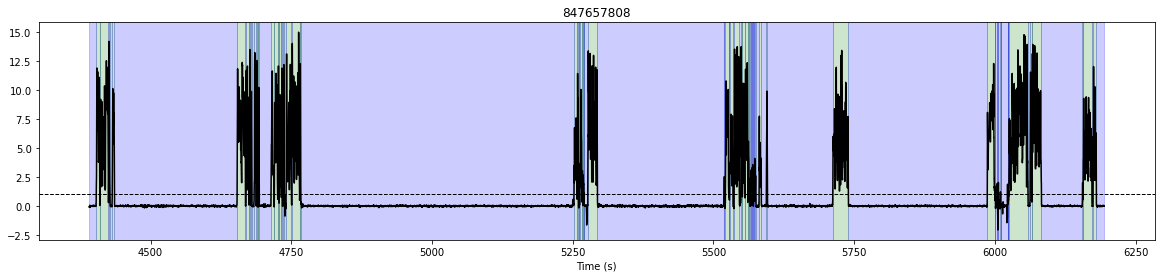

In [7]:
for session in SESSIONS:
    print(f"\nAnalyzing session: \t{session}")

    # load data
    data_in = pd.read_pickle(f"{PROJECT_PATH}/data/behavior/running/spontaneous/running_{session}.pkl")
    behavior_series = data_in.analogsignals[4]
    above_epochs, below_epochs = find_segments(behavior_series.magnitude.T[0], 
                                                 THRESHOLD, True)
    
    above_epochs = above_epochs.astype('float64')/RF
    below_epochs = below_epochs.astype('float64')/RF
    
    above_epochs += float(behavior_series.t_start)
    below_epochs += float(behavior_series.t_start)
    
    print(f"\nAbove Epochs: {len(above_epochs)}\tBelow Epochs: {len(below_epochs)}\n")
    
    plot_epochs(behavior_series.magnitude.T[0], behavior_series.times, above_epochs, below_epochs, threshold=THRESHOLD, mark_epochs=False)
    plt.title(session)
    # plt.title(f"{session} - Above")
    
    # plot_epochs(behavior_series.magnitude.T[0], behavior_series.times, below_epochs, 1)
    # plt.title(f"{session} - Below")

Join Epochs with Gap:


Analyzing session: 	766640955
Identified 44 epochs
Joined 28 / 44 epochs
Joined 32 / 45 epochs

Above Epochs: 16	Below Epochs: 13


Analyzing session: 	767871931
Identified 22 epochs
Joined 13 / 22 epochs
Joined 6 / 22 epochs

Above Epochs: 9	Below Epochs: 16


Analyzing session: 	768515987
Identified 157 epochs
Joined 87 / 157 epochs
Joined 136 / 157 epochs

Above Epochs: 70	Below Epochs: 21


Analyzing session: 	771160300
Identified 75 epochs
Joined 56 / 75 epochs
Joined 42 / 76 epochs

Above Epochs: 19	Below Epochs: 34


Analyzing session: 	771990200
Identified 47 epochs
Joined 27 / 47 epochs
Joined 25 / 48 epochs

Above Epochs: 20	Below Epochs: 23


Analyzing session: 	774875821
Identified 50 epochs
Joined 19 / 50 epochs
Joined 26 / 51 epochs

Above Epochs: 31	Below Epochs: 25


Analyzing session: 	778240327
Identified 114 epochs
Joined 77 / 114 epochs
Joined 28 / 113 epochs

Above Epochs: 37	Below Epochs: 85


Analyzing session: 	778998620
Identified 14 epochs
Joined 6 / 14 epoch

C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Analyzing session: 	840012044
Identified 80 epochs
Joined 22 / 80 epochs
Joined 18 / 81 epochs

Above Epochs: 58	Below Epochs: 63


Analyzing session: 	847657808
Identified 60 epochs
Joined 42 / 60 epochs
Joined 34 / 61 epochs

Above Epochs: 18	Below Epochs: 27



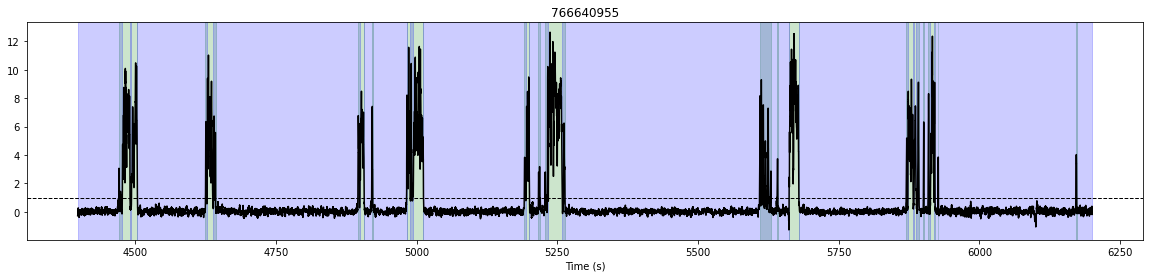

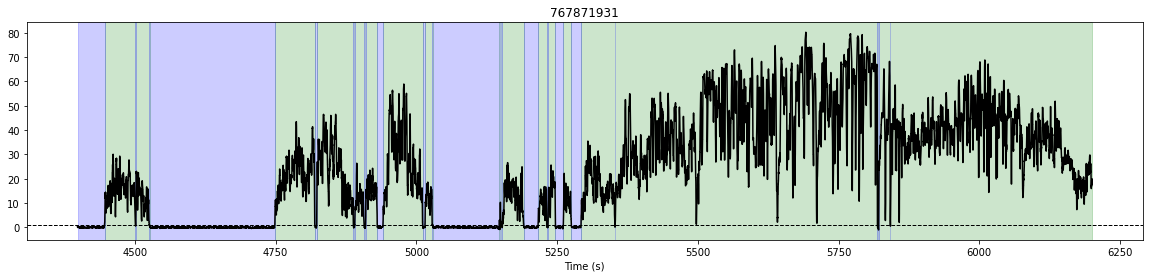

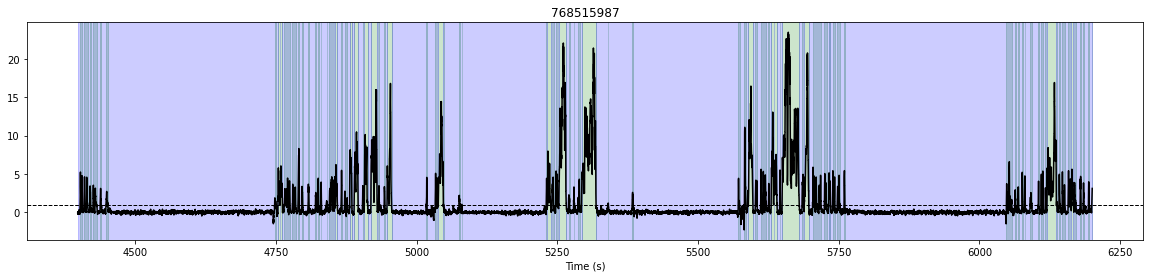

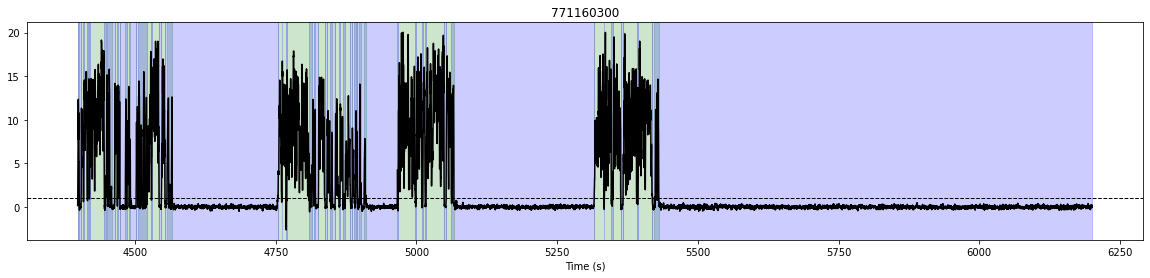

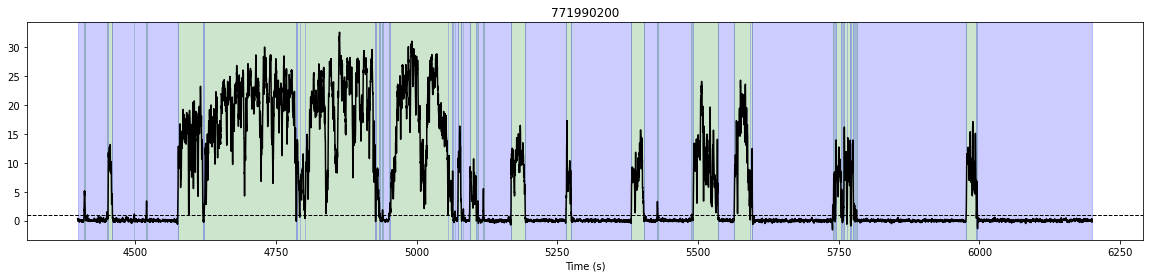

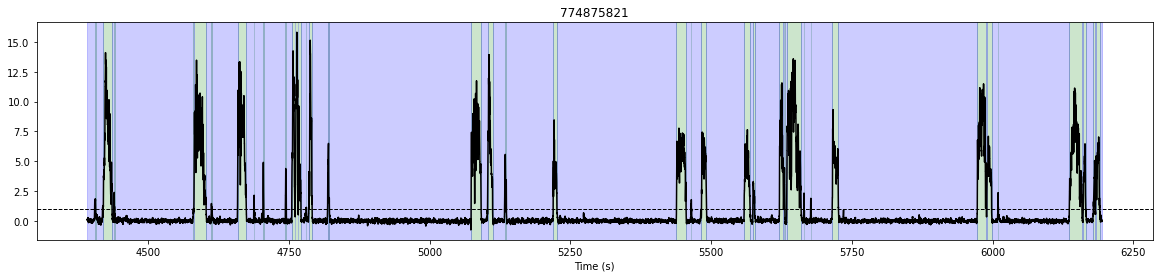

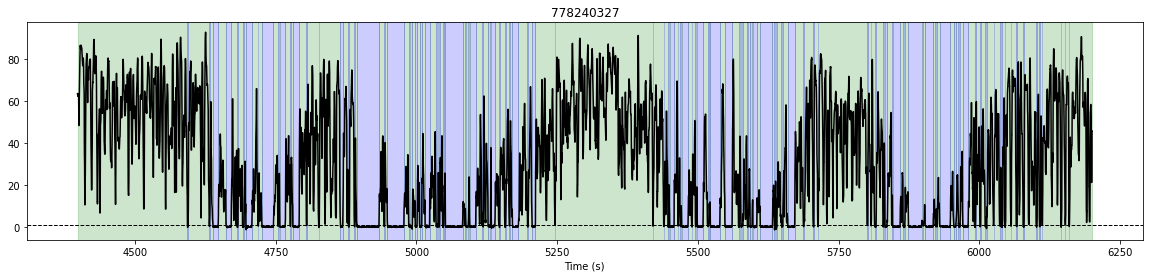

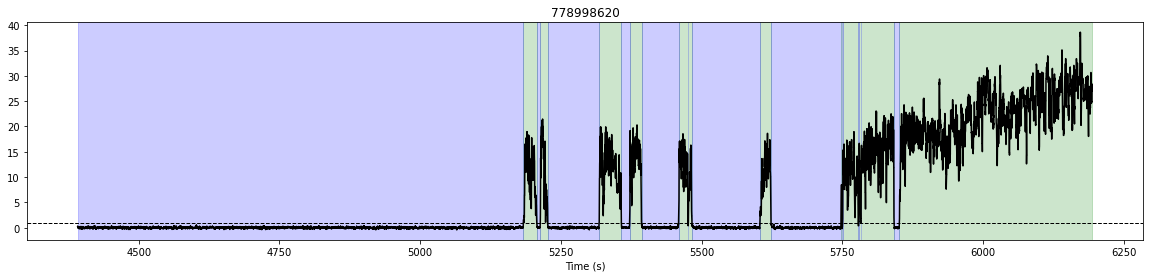

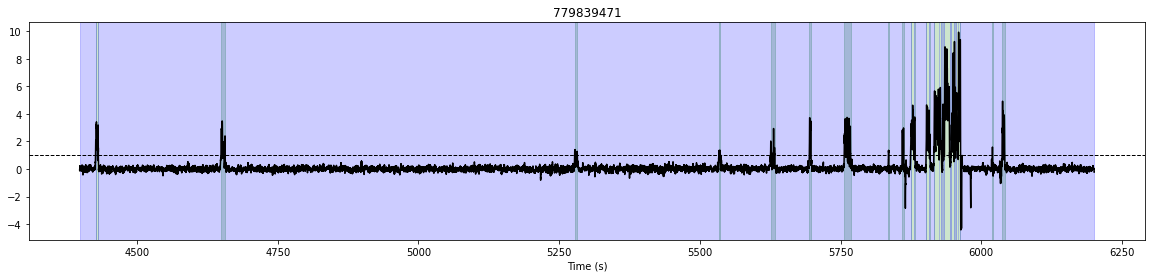

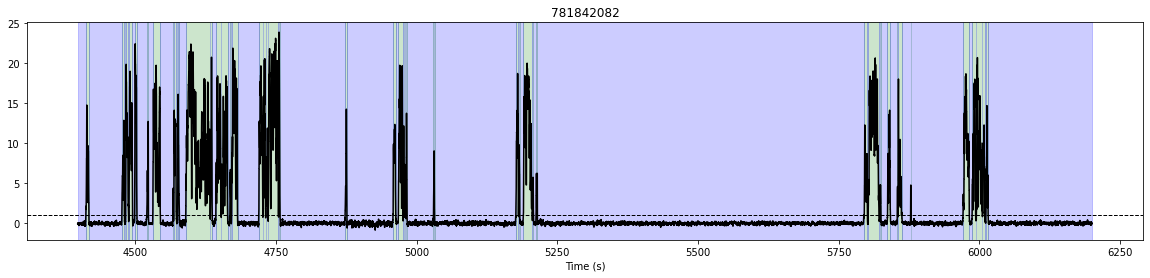

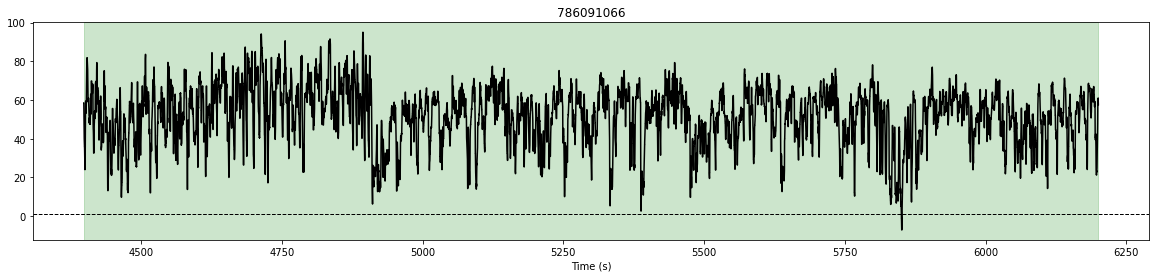

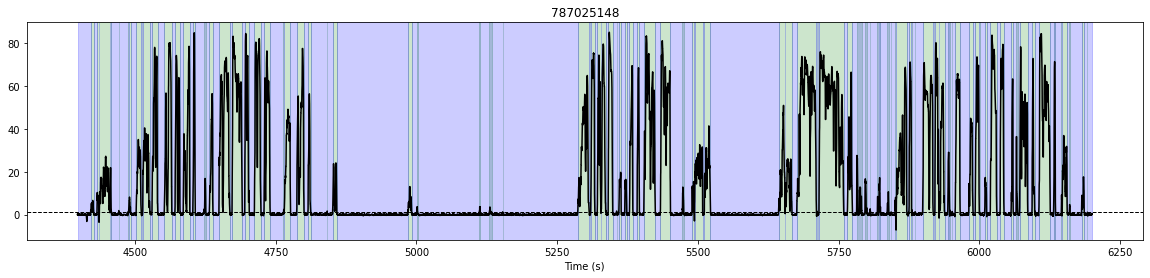

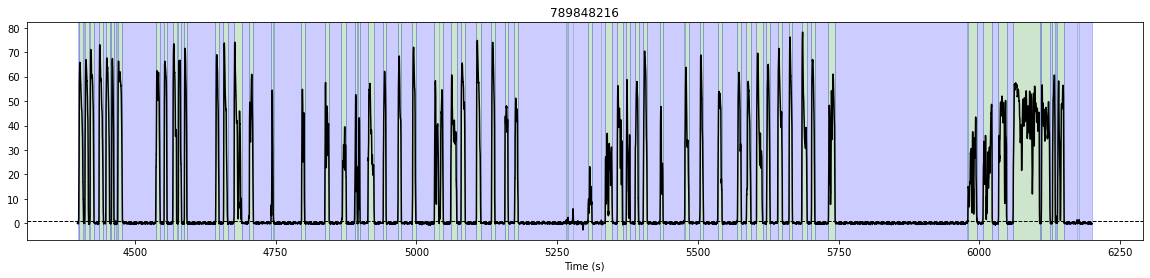

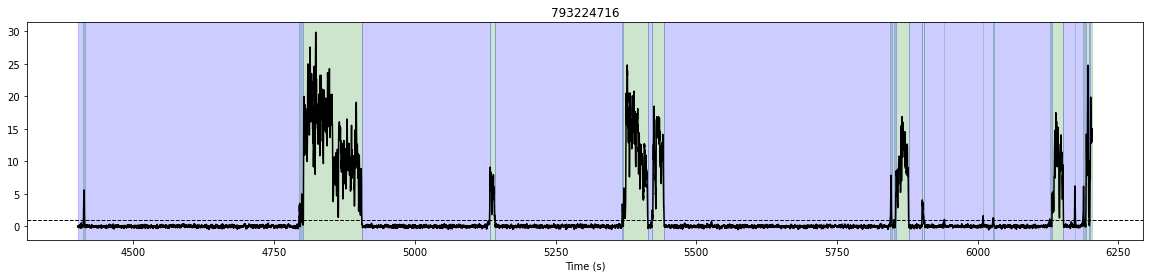

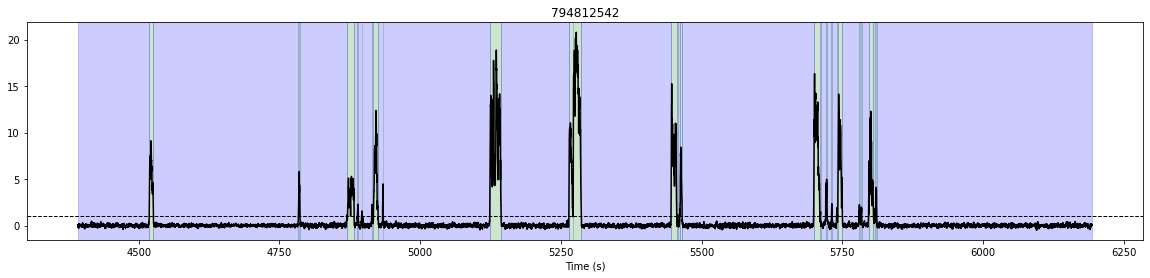

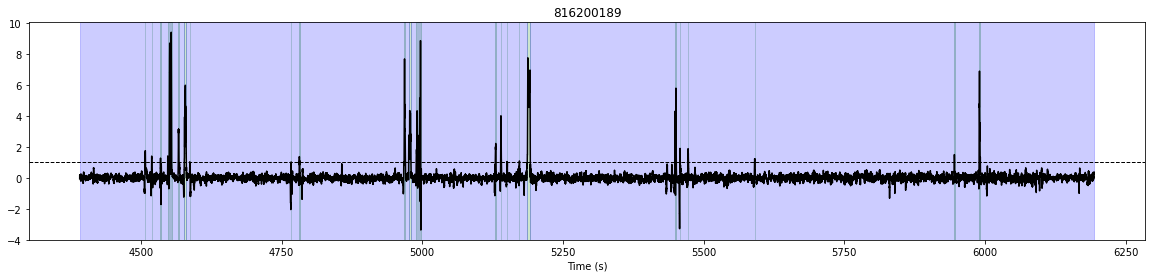

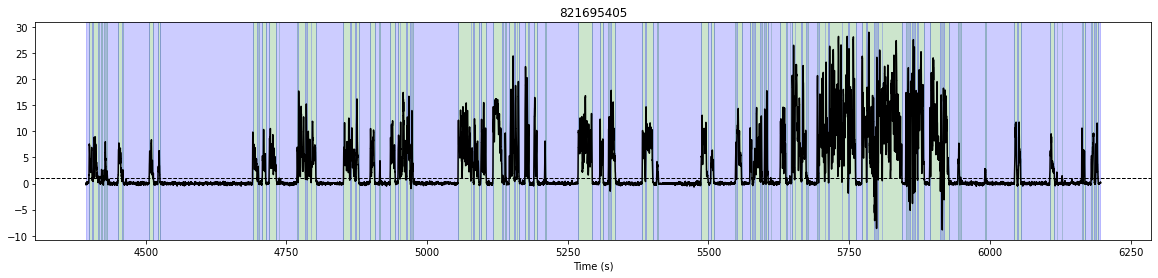

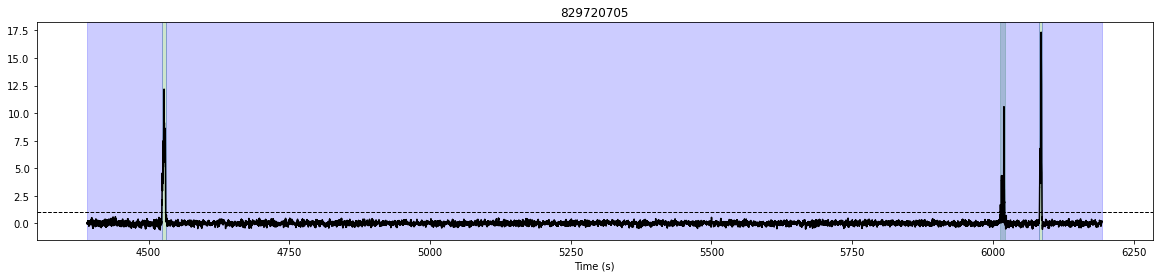

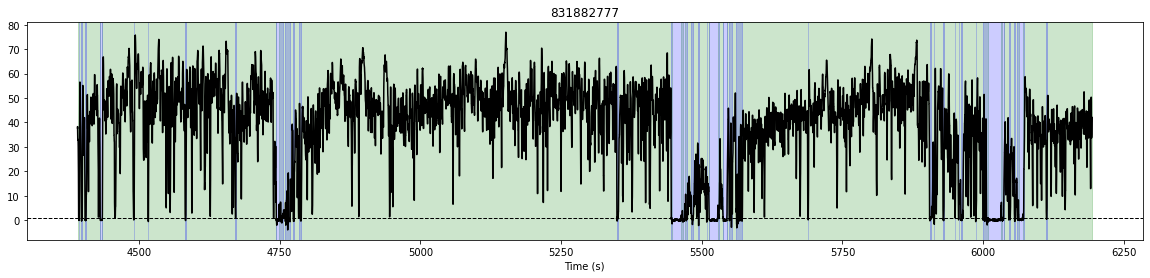

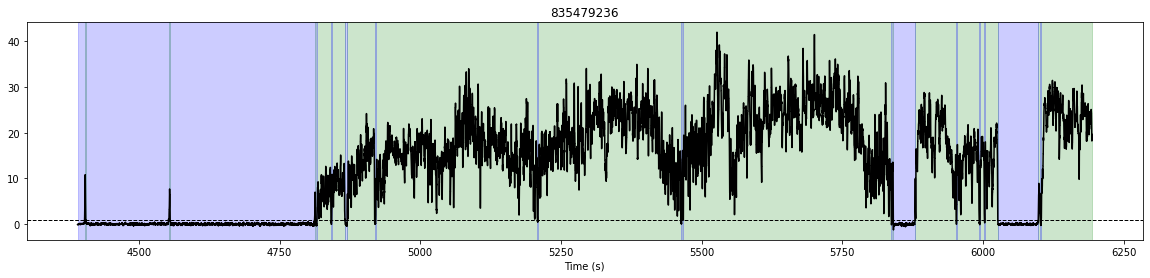

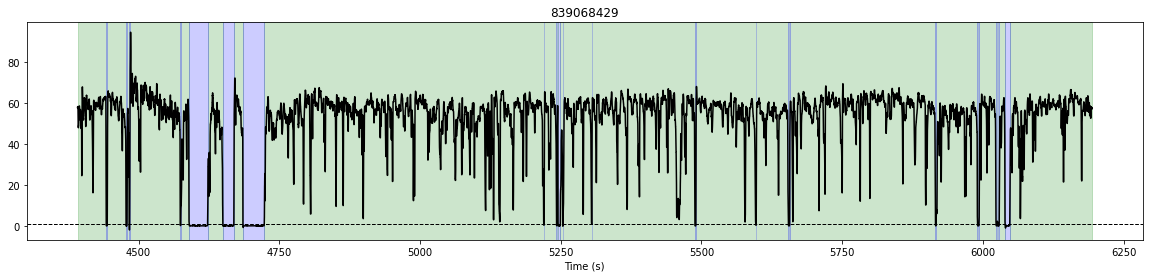

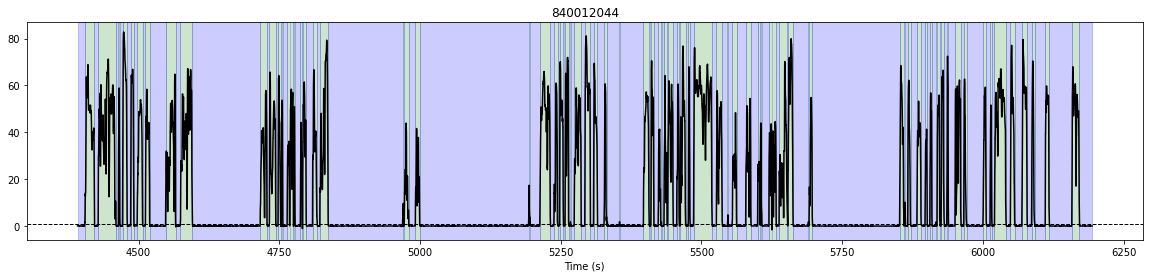

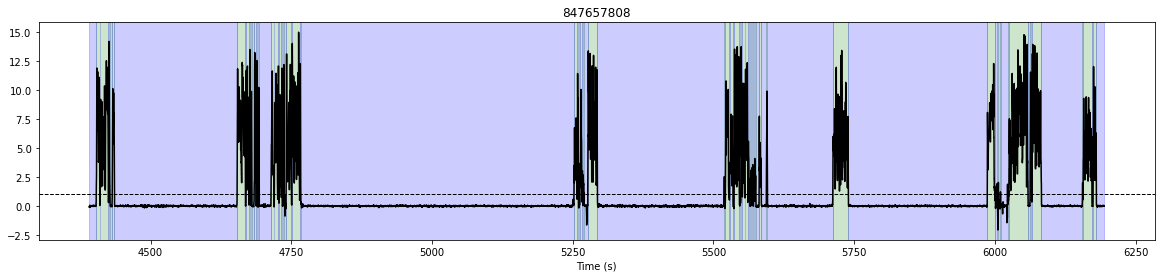

In [14]:
for session in SESSIONS:
    print(f"\nAnalyzing session: \t{session}")

    # load data
    data_in = pd.read_pickle(f"{PROJECT_PATH}/data/behavior/running/spontaneous/running_{session}.pkl")
    behavior_series = data_in.analogsignals[4]
    above_epochs, below_epochs = find_segments(behavior_series.magnitude.T[0], 
                                                 THRESHOLD, True)
    
    above_epochs = join_epochs_with_gap(above_epochs/RF, min_gap=MIN_GAP)
    below_epochs = join_epochs_with_gap(below_epochs/RF, min_gap=MIN_GAP)
    
    above_epochs += float(behavior_series.t_start)
    below_epochs += float(behavior_series.t_start)
    
    print(f"\nAbove Epochs: {len(above_epochs)}\tBelow Epochs: {len(below_epochs)}\n")
    
    plot_epochs(behavior_series.magnitude.T[0], behavior_series.times, above_epochs, below_epochs, threshold=THRESHOLD, mark_epochs=False)
    plt.title(session)
    # plt.title(f"{session} - Above")
    
    # plot_epochs(behavior_series.magnitude.T[0], behavior_series.times, below_epochs, 1)
    # plt.title(f"{session} - Below")

Drop Short Epochs


Analyzing session: 	766640955
Identified 44 epochs
Joined 28 / 44 epochs
Joined 32 / 45 epochs
Dropped 13 / 16 epochs
Dropped 4 / 13 epochs

Above Epochs: 3	Below Epochs: 9


Analyzing session: 	767871931
Identified 22 epochs
Joined 13 / 22 epochs
Joined 6 / 22 epochs
Dropped 2 / 9 epochs
Dropped 13 / 16 epochs

Above Epochs: 7	Below Epochs: 3


Analyzing session: 	768515987
Identified 157 epochs
Joined 87 / 157 epochs
Joined 136 / 157 epochs
Dropped 69 / 70 epochs
Dropped 12 / 21 epochs

Above Epochs: 1	Below Epochs: 9


Analyzing session: 	771160300
Identified 75 epochs
Joined 56 / 75 epochs
Joined 42 / 76 epochs
Dropped 13 / 19 epochs
Dropped 30 / 34 epochs

Above Epochs: 6	Below Epochs: 4


Analyzing session: 	771990200
Identified 47 epochs
Joined 27 / 47 epochs
Joined 25 / 48 epochs
Dropped 15 / 20 epochs
Dropped 14 / 23 epochs

Above Epochs: 5	Below Epochs: 9


Analyzing session: 	774875821
Identified 50 epochs
Joined 19 / 50 epochs
Joined 26 / 51 epochs
Dropped 31 / 31 epochs
D

C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


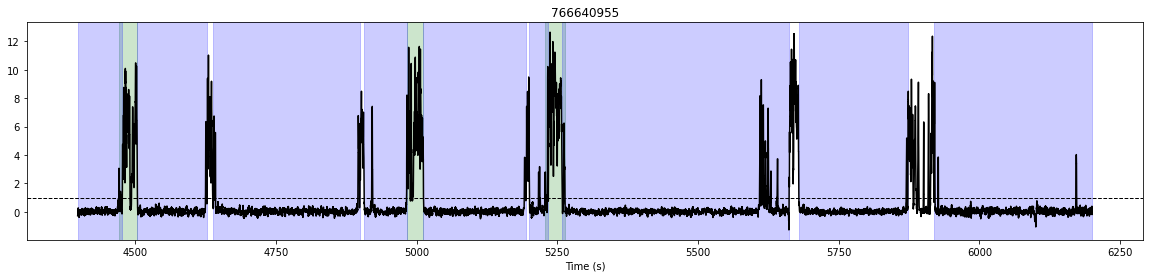

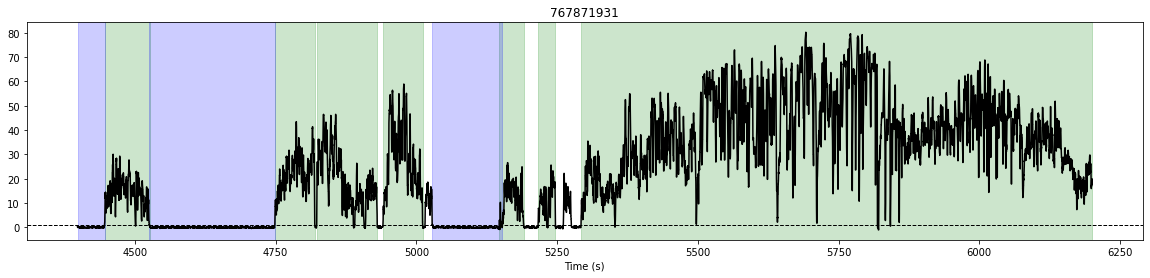

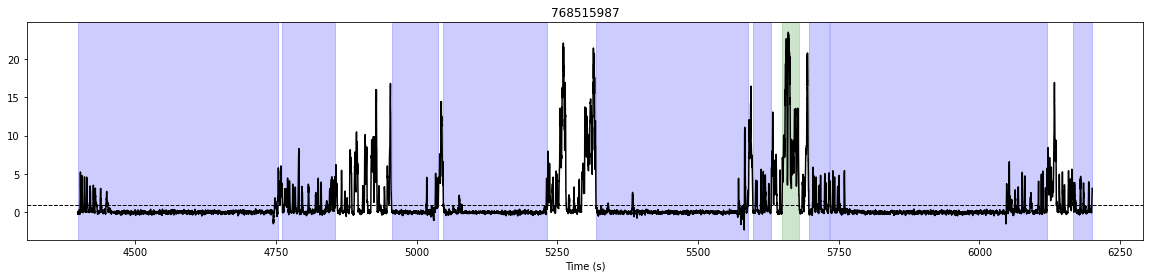

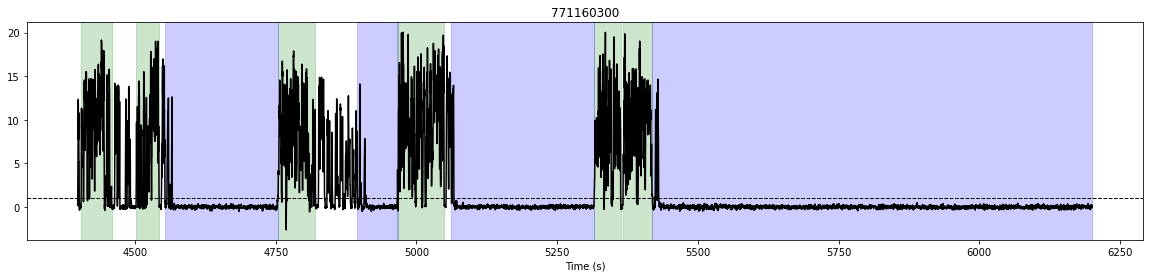

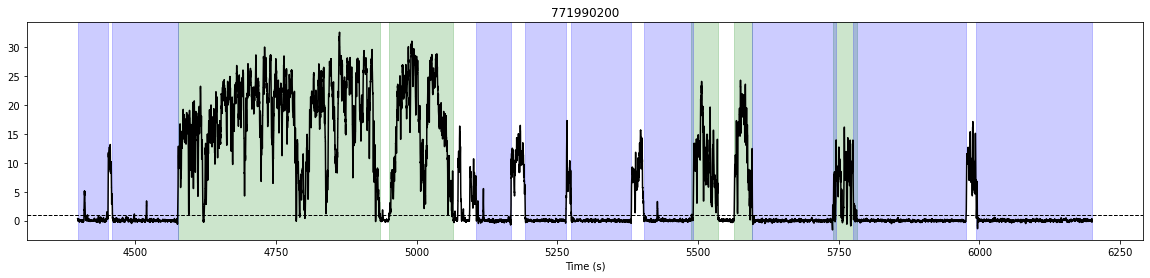

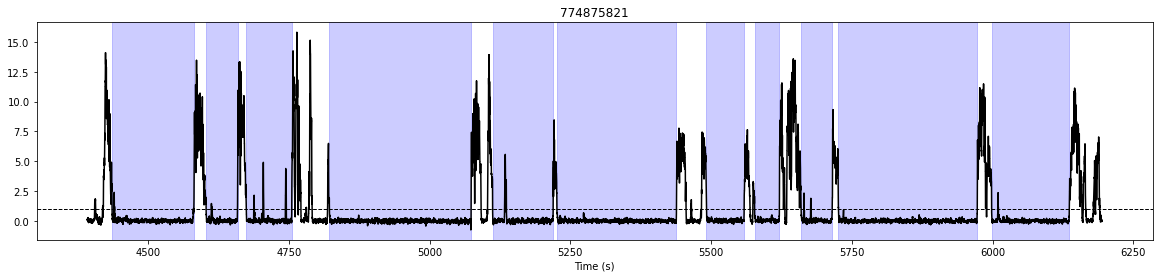

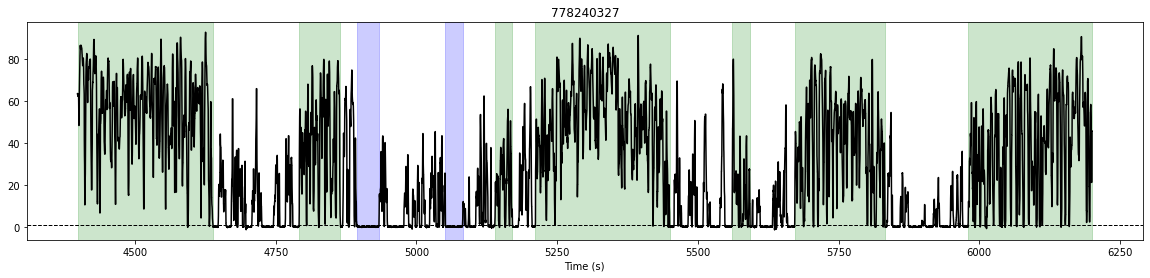

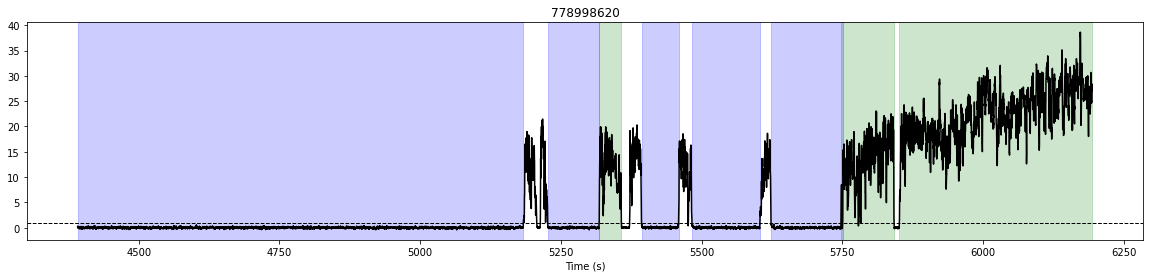

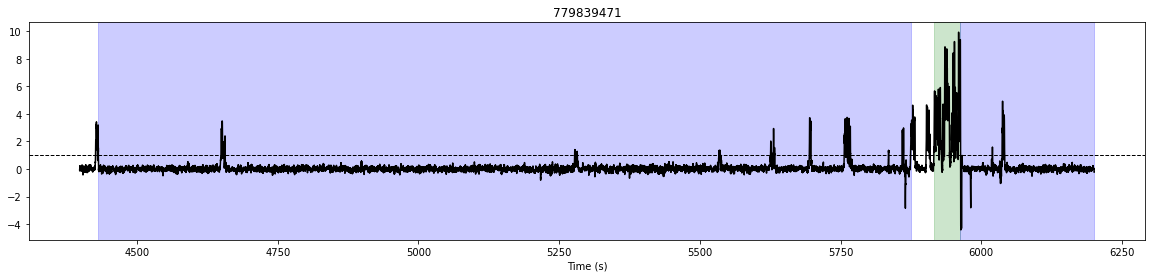

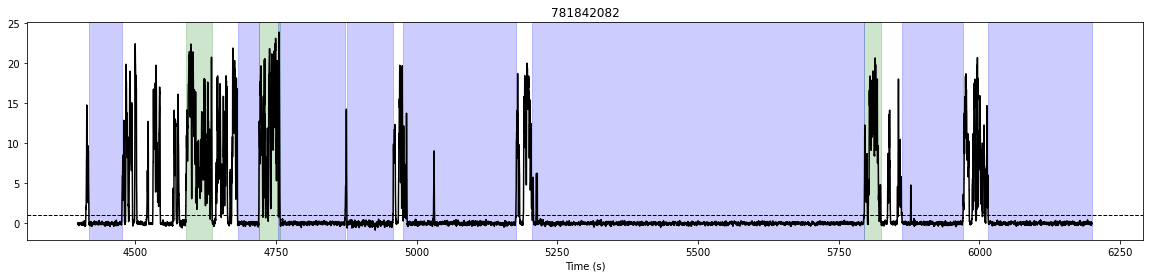

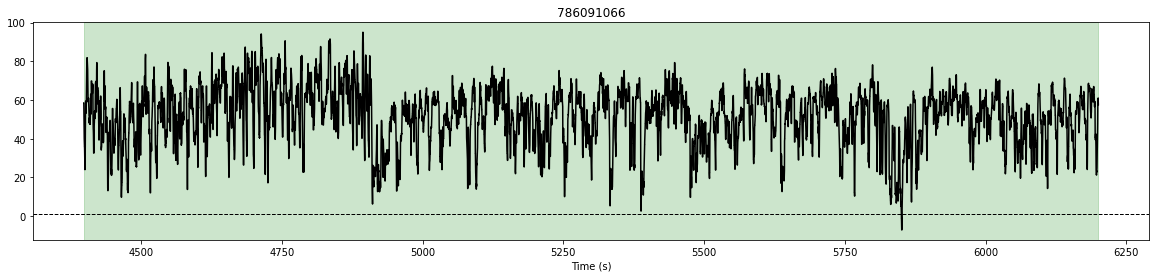

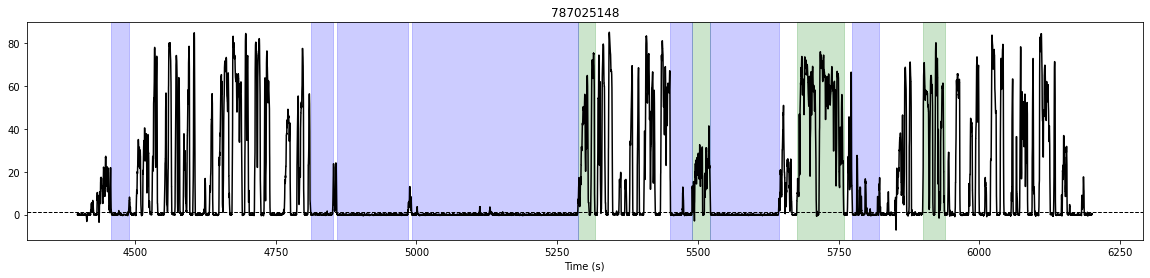

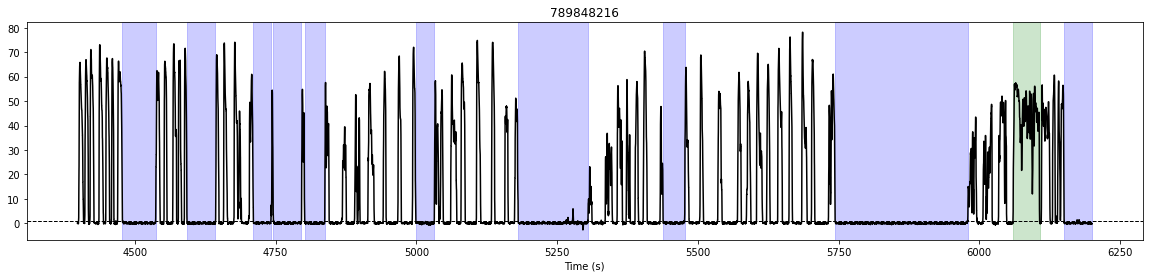

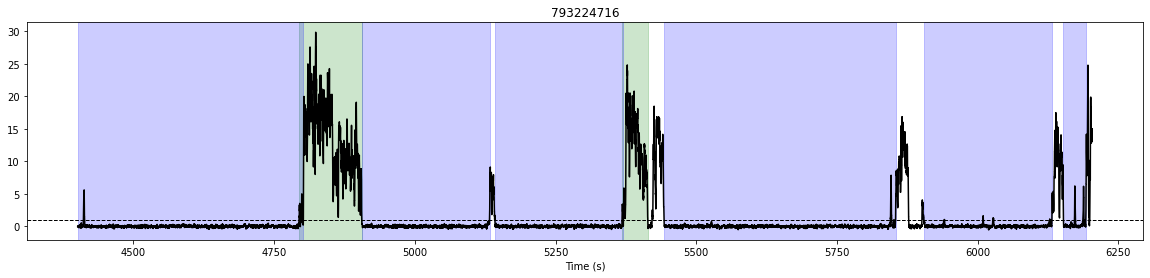

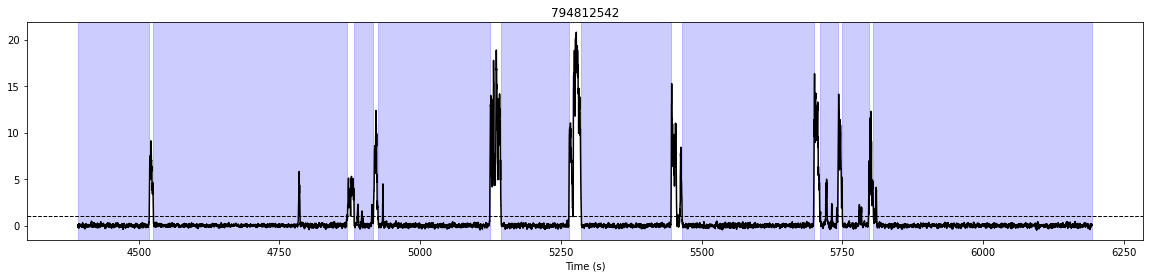

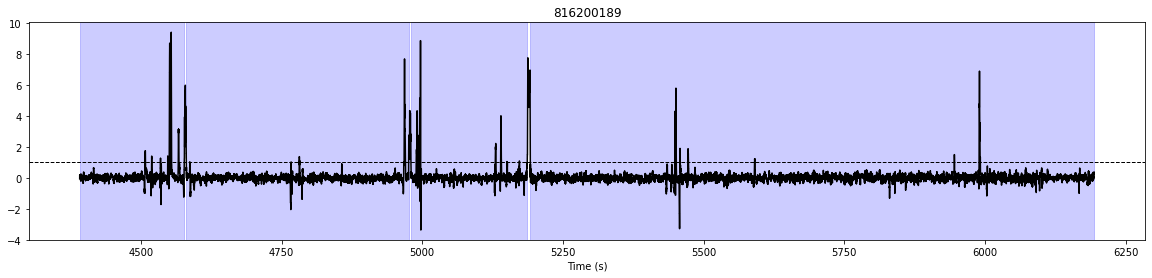

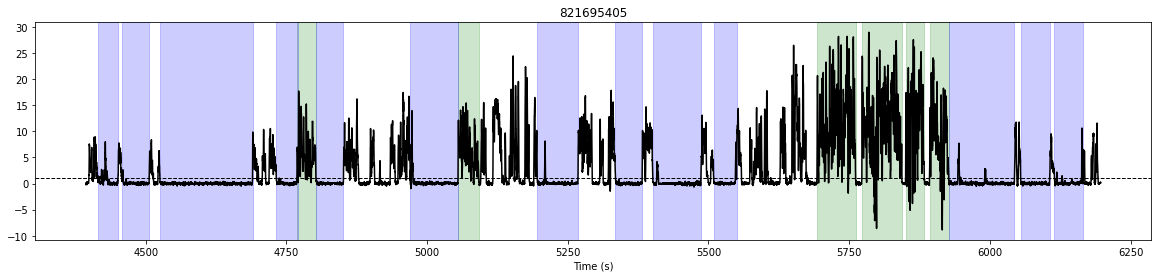

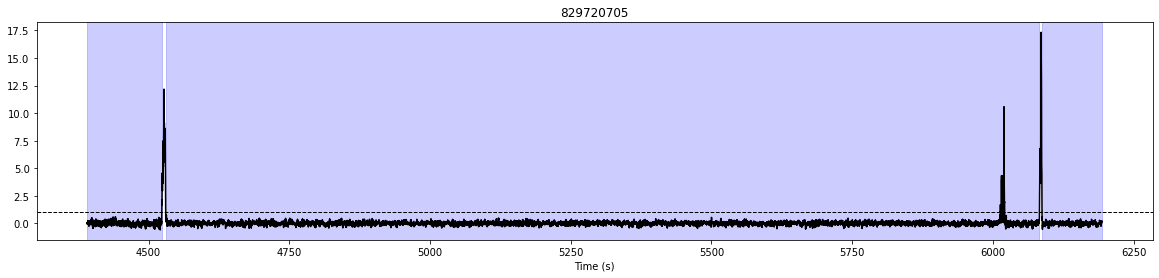

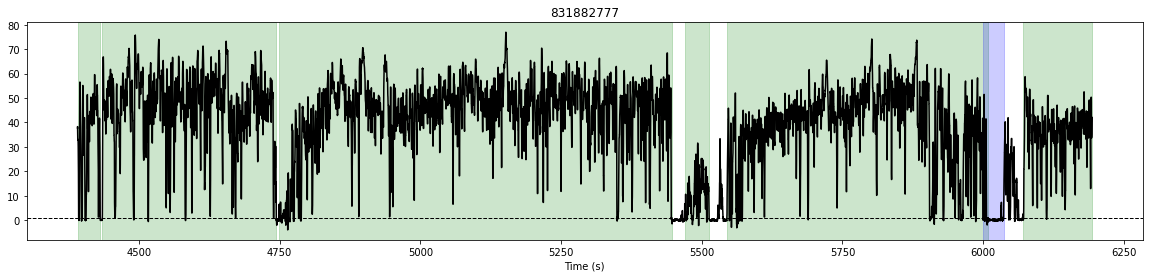

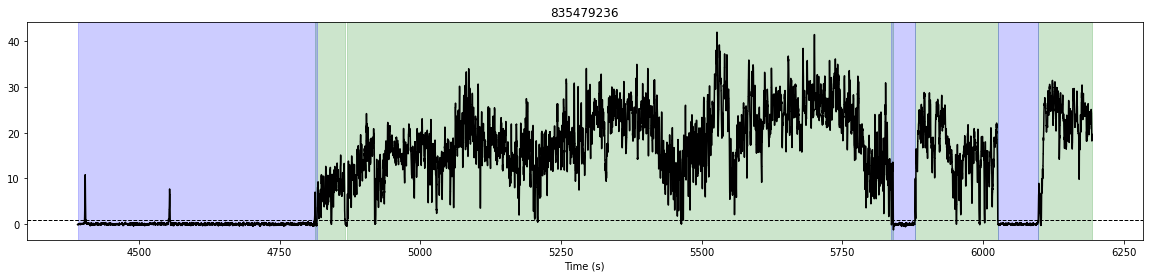

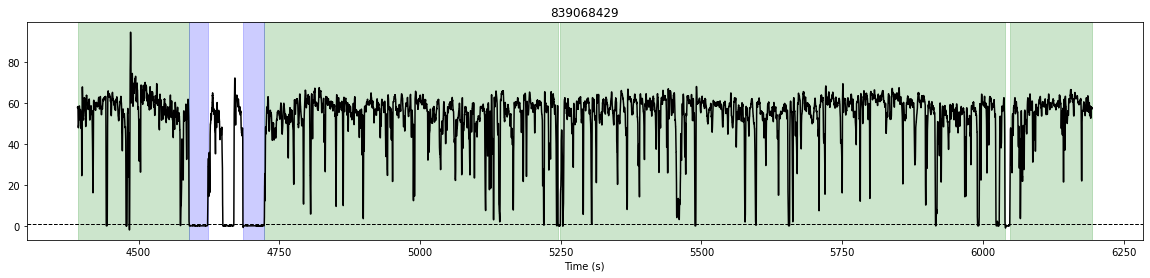

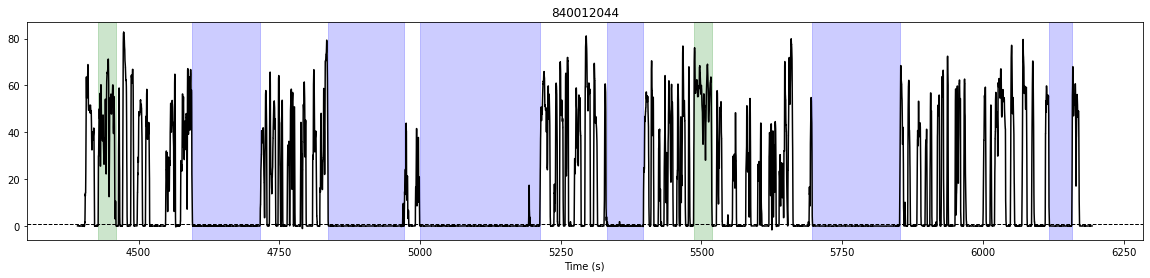

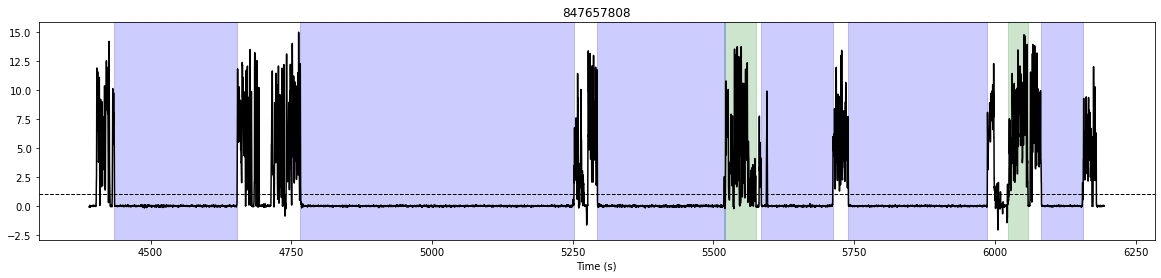

In [15]:
for session in SESSIONS:
    print(f"\nAnalyzing session: \t{session}")

    # load data
    data_in = pd.read_pickle(f"{PROJECT_PATH}/data/behavior/running/spontaneous/running_{session}.pkl")
    behavior_series = data_in.analogsignals[4]
    above_epochs, below_epochs = find_segments(behavior_series.magnitude.T[0], 
                                                 THRESHOLD, True)
    
    above_epochs = join_epochs_with_gap(above_epochs/RF, min_gap=MIN_GAP)
    below_epochs = join_epochs_with_gap(below_epochs/RF, min_gap=MIN_GAP)
    
    # drop short epochs
    above_epochs = drop_short_epochs(above_epochs, min_duration=MIN_DURATION)
    below_epochs = drop_short_epochs(below_epochs, min_duration=MIN_DURATION)
    
    above_epochs += float(behavior_series.t_start)
    below_epochs += float(behavior_series.t_start)
    
    print(f"\nAbove Epochs: {len(above_epochs)}\tBelow Epochs: {len(below_epochs)}\n")
    
    plot_epochs(behavior_series.magnitude.T[0], behavior_series.times, above_epochs, below_epochs, threshold=THRESHOLD, mark_epochs=False)
    plt.title(session)
    # plt.title(f"{session} - Above")
    
    # plot_epochs(behavior_series.magnitude.T[0], behavior_series.times, below_epochs, 1)
    # plt.title(f"{session} - Below")

Put It All Together with get_epoch_times:


Analyzing session: 	766640955
Identified 44 epochs
Joined 28 / 44 epochs
Joined 32 / 45 epochs
Dropped 13 / 16 epochs
Dropped 4 / 13 epochs

Above Epochs: 3	Below Epochs: 51


Analyzing session: 	767871931
Identified 22 epochs
Joined 13 / 22 epochs
Joined 6 / 22 epochs
Dropped 2 / 9 epochs
Dropped 13 / 16 epochs

Above Epochs: 41	Below Epochs: 12


Analyzing session: 	768515987
Identified 157 epochs
Joined 87 / 157 epochs
Joined 136 / 157 epochs
Dropped 69 / 70 epochs
Dropped 12 / 21 epochs

Above Epochs: 1	Below Epochs: 46


Analyzing session: 	771160300
Identified 75 epochs
Joined 56 / 75 epochs
Joined 42 / 76 epochs
Dropped 13 / 19 epochs
Dropped 30 / 34 epochs

Above Epochs: 8	Below Epochs: 42


Analyzing session: 	771990200
Identified 47 epochs
Joined 27 / 47 epochs
Joined 25 / 48 epochs
Dropped 15 / 20 epochs
Dropped 14 / 23 epochs

Above Epochs: 17	Below Epochs: 29


Analyzing session: 	774875821
Identified 50 epochs
Joined 19 / 50 epochs
Joined 26 / 51 epochs
Dropped 31 / 31 e

C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Identified 60 epochs
Joined 42 / 60 epochs
Joined 34 / 61 epochs
Dropped 16 / 18 epochs
Dropped 21 / 27 epochs

Above Epochs: 2	Below Epochs: 44



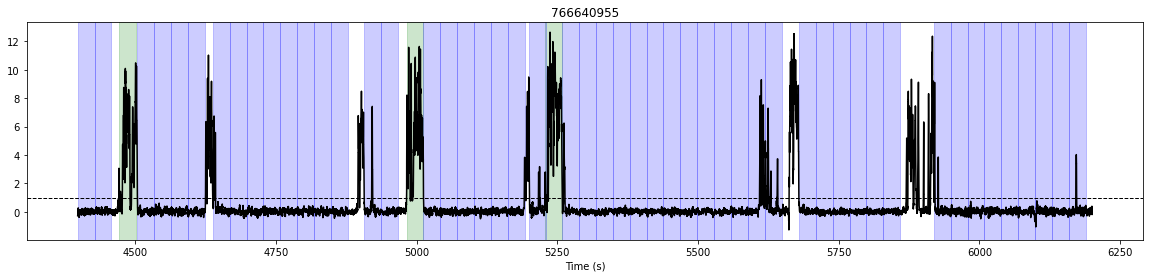

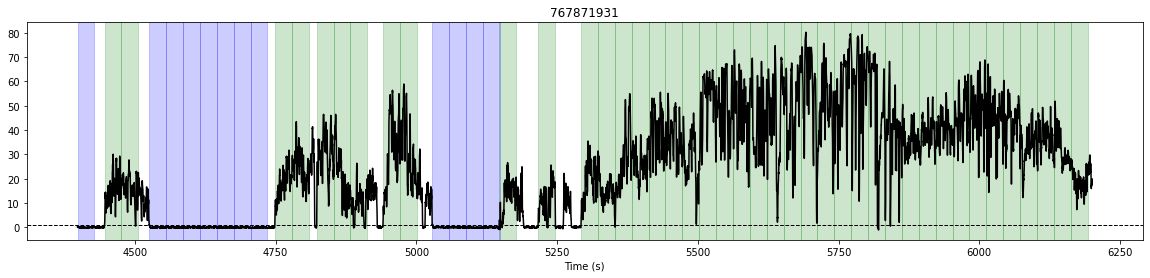

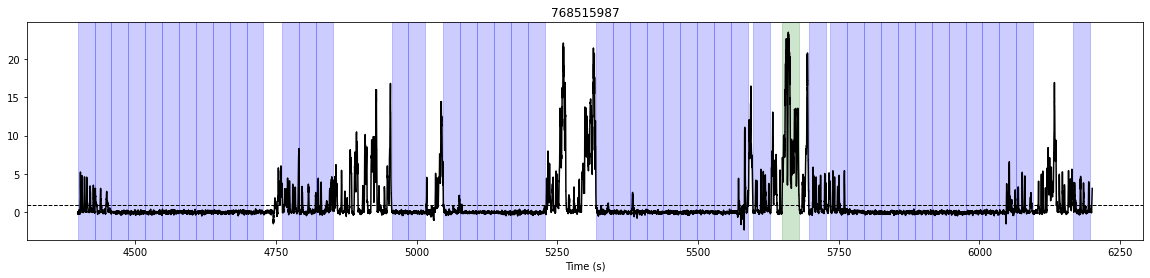

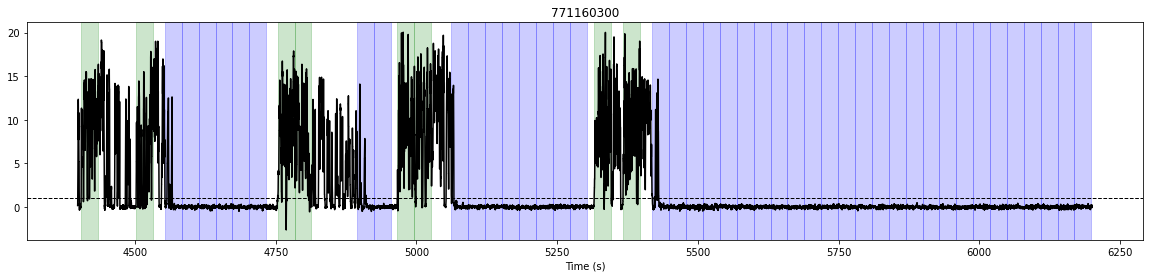

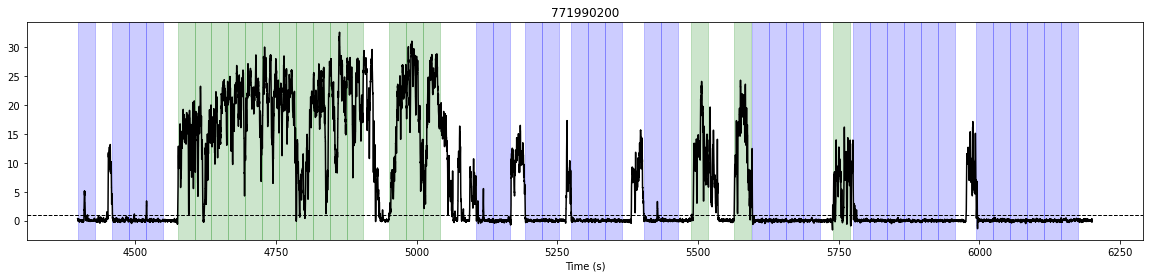

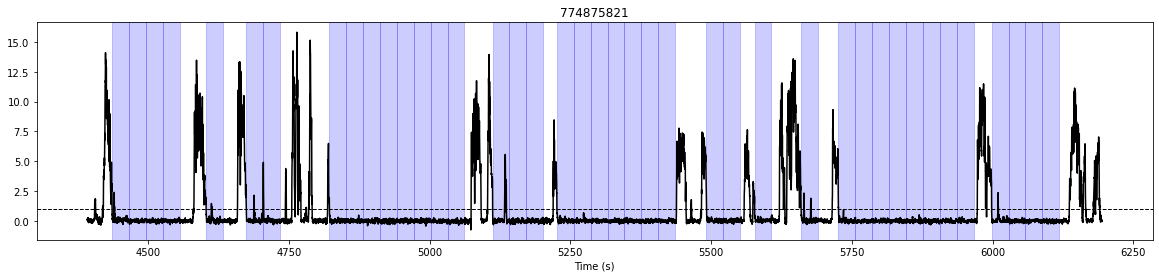

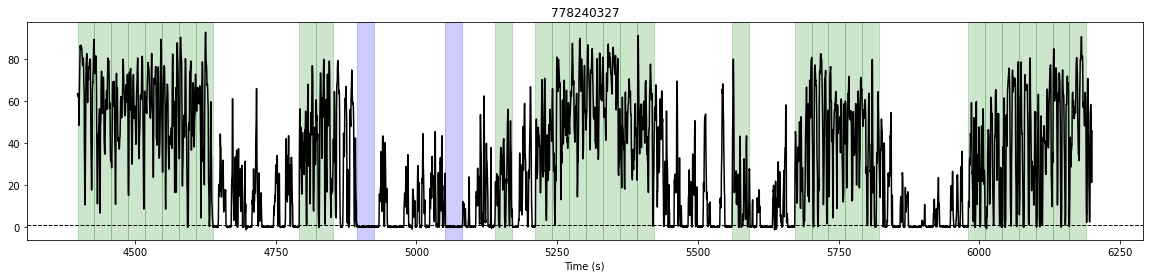

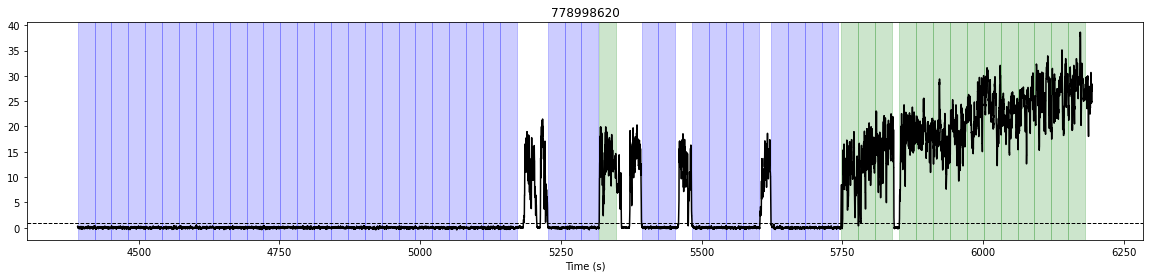

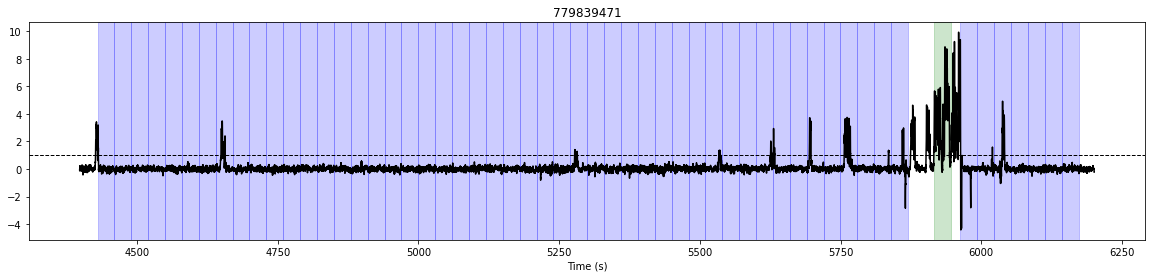

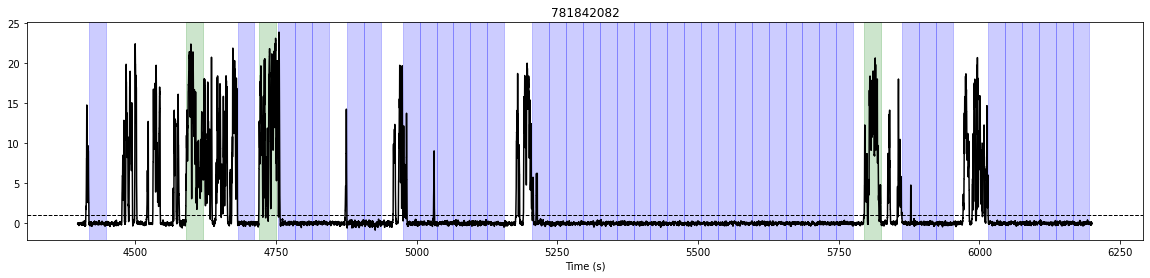

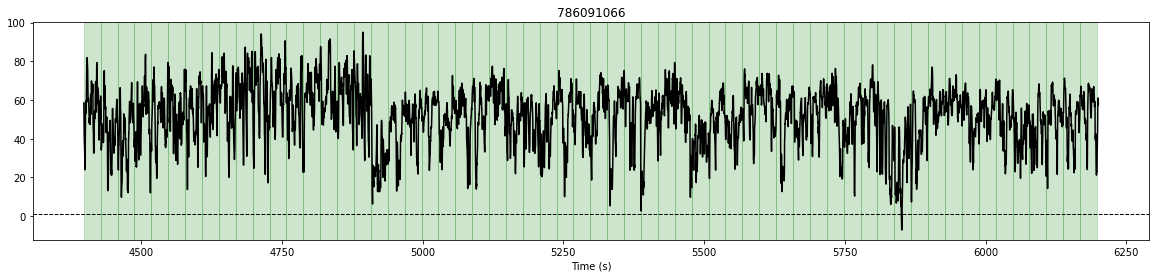

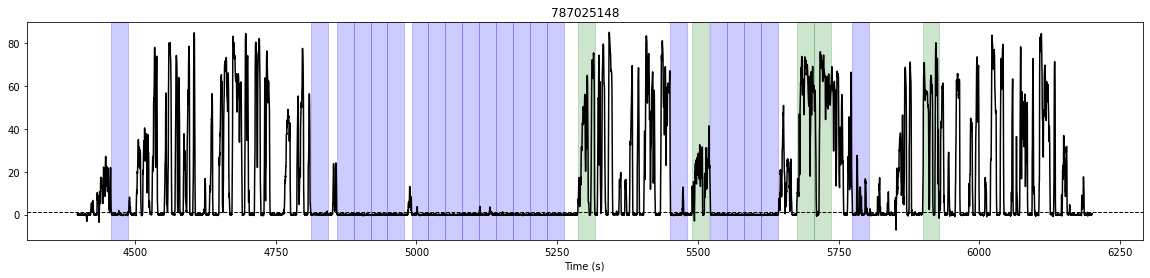

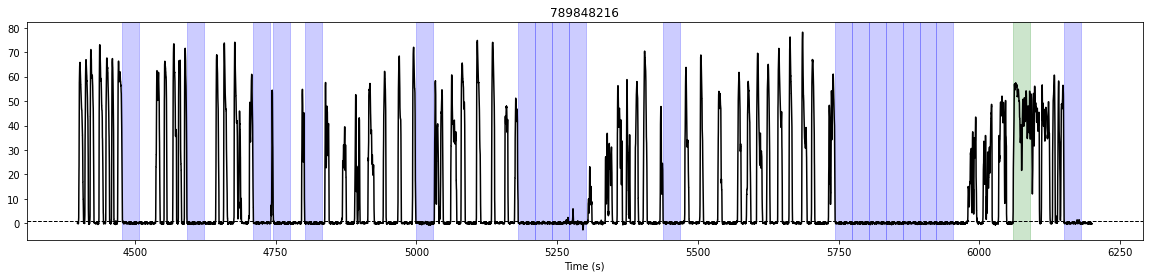

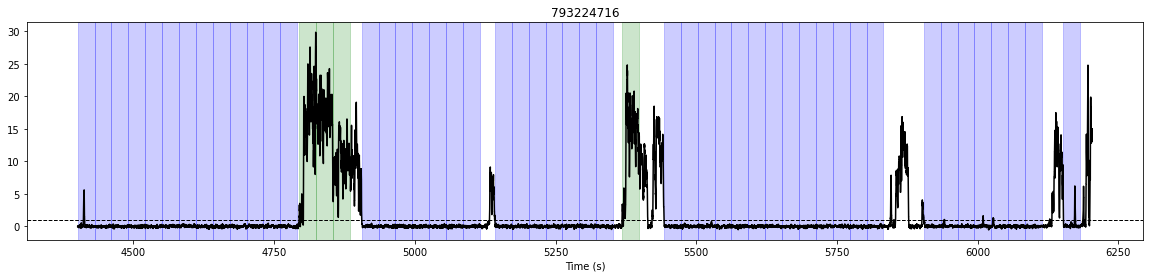

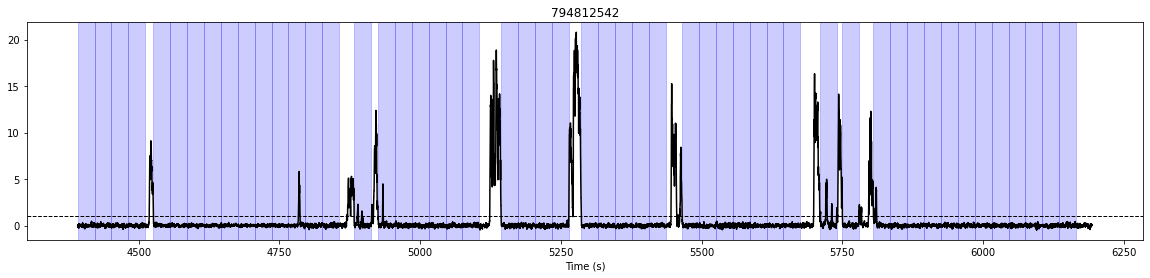

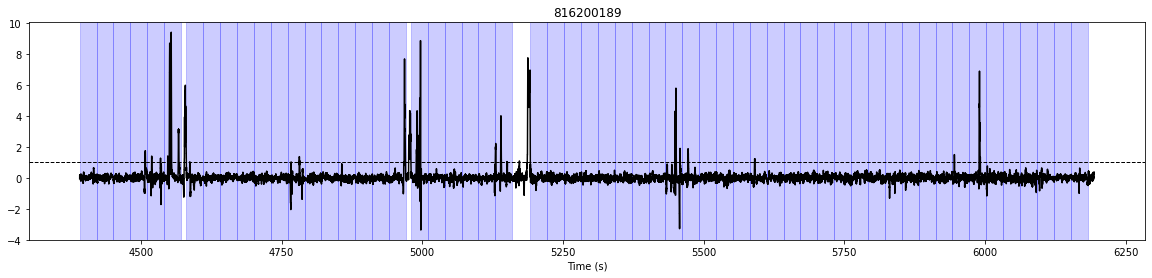

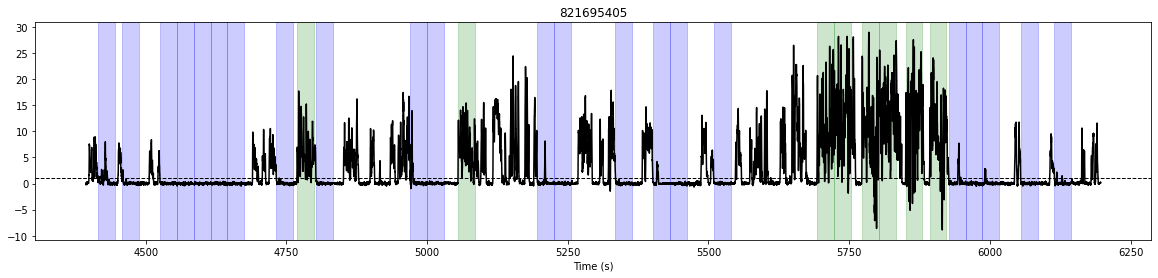

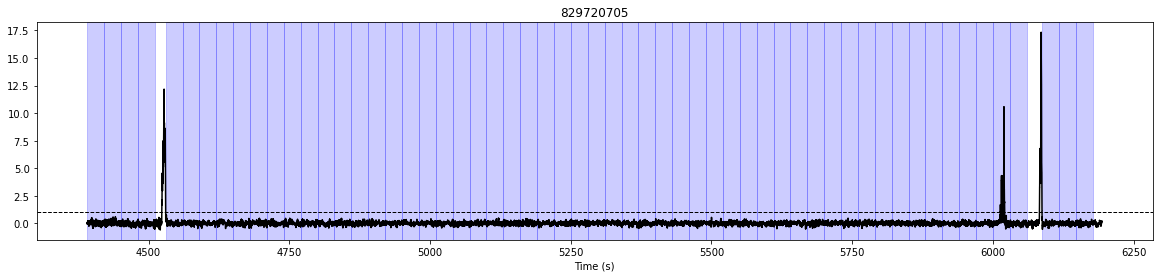

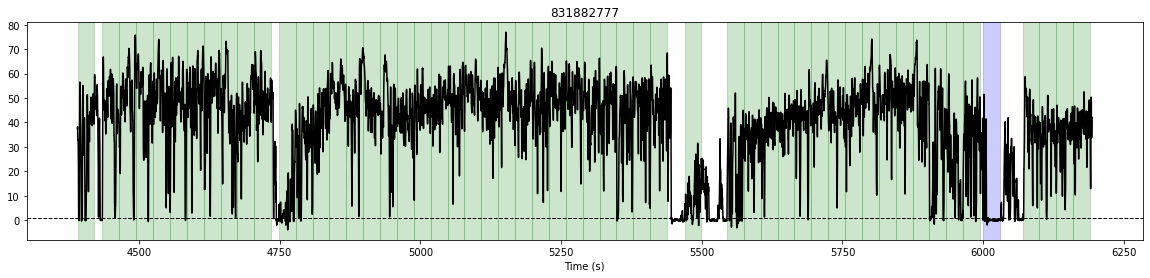

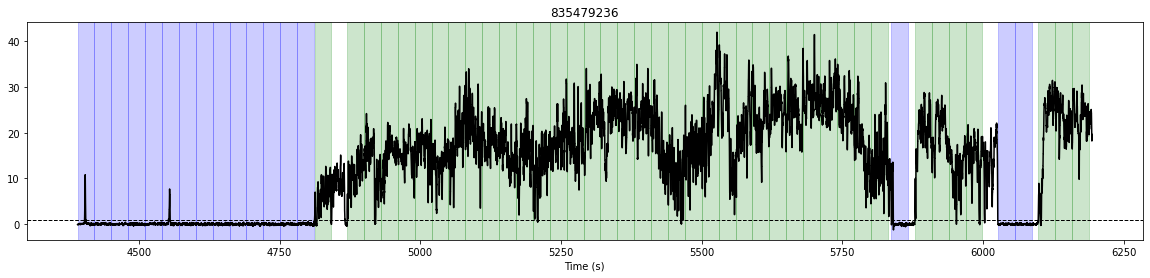

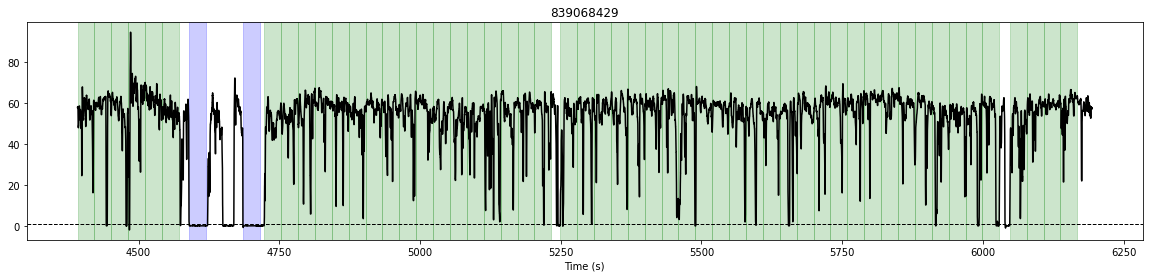

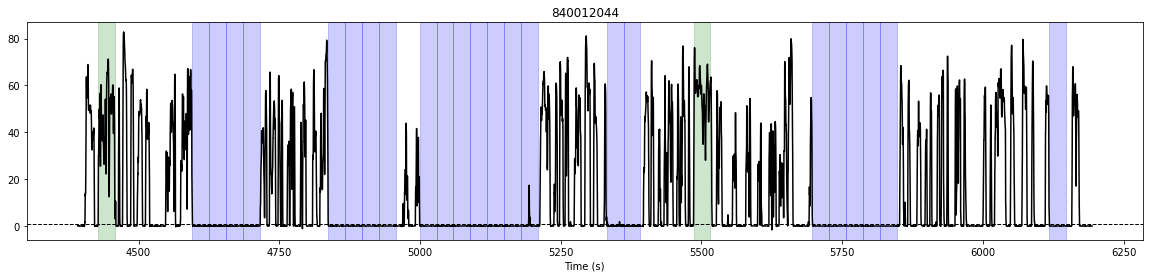

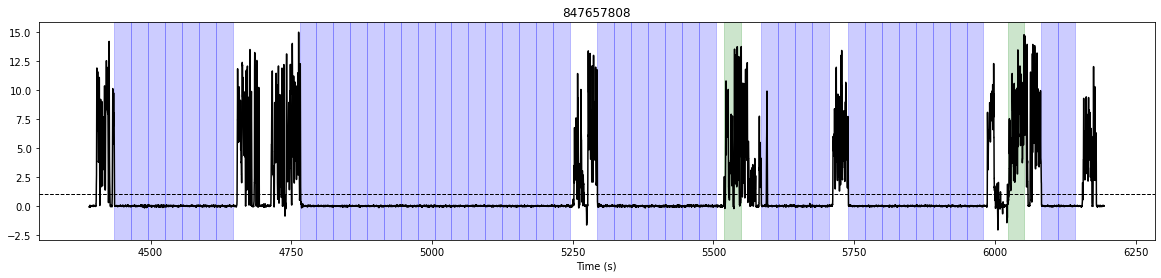

In [16]:
for session in SESSIONS:
    print(f"\nAnalyzing session: \t{session}")

    # load data
    data_in = pd.read_pickle(f"{PROJECT_PATH}/data/behavior/running/spontaneous/running_{session}.pkl")
    behavior_series = data_in.analogsignals[4]
    above_epochs, below_epochs = get_epoch_times(behavior_series.magnitude.T[0], 
                                                 THRESHOLD, MIN_GAP, MIN_DURATION, RF)
    
    above_epochs += float(behavior_series.t_start)
    below_epochs += float(behavior_series.t_start)
    above_epochs = np.array(split_epochs(above_epochs, MIN_DURATION))
    below_epochs = np.array(split_epochs(below_epochs, MIN_DURATION))
    
    print(f"\nAbove Epochs: {len(above_epochs)}\tBelow Epochs: {len(below_epochs)}\n")
    
    plot_epochs(behavior_series.magnitude.T[0], behavior_series.times, above_epochs, below_epochs, threshold=THRESHOLD, mark_epochs=False)
    plt.title(session)
    # plt.title(f"{session} - Above")
    
    # plot_epochs(behavior_series.magnitude.T[0], behavior_series.times, below_epochs, 1)
    # plt.title(f"{session} - Below")

In [12]:
# 6 or 7 problematic sessions with few epochs

# raising min_gap helps a tiny bit

# Pupil Data

In [18]:
# settings for testing
THRESHOLD = 0.003
MIN_GAP = 5
MIN_DURATION = 30
PF = 50

In [19]:
for session in session_ids:
    print(f"\nAnalyzing session: \t{session}")
    
    if not os.path.exists(f"{PROJECT_PATH}/data/behavior/pupil/spontaneous/pupil_area_{session}.pkl"):
        continue

    # load data
    data_in = pd.read_pickle(f"{PROJECT_PATH}/data/behavior/pupil/spontaneous/pupil_area_{session}.pkl")
    behavior_series = data_in.analogsignals[4]
    above_epochs, below_epochs = get_epoch_times(behavior_series.magnitude.T[0], 
                                                 THRESHOLD, MIN_GAP, MIN_DURATION, RF)
    
    above_epochs += float(behavior_series.t_start)
    below_epochs += float(behavior_series.t_start)
    above_epochs = np.array(split_epochs(above_epochs, MIN_DURATION))
    below_epochs = np.array(split_epochs(below_epochs, MIN_DURATION))
    
    print(f"\nAbove Epochs: {len(above_epochs)}\tBelow Epochs: {len(below_epochs)}\n")


Analyzing session: 	766640955
Identified 43 epochs
Joined 27 / 43 epochs
Dropped 11 / 16 epochs
Dropped 0 / 5 epochs

Above Epochs: 8	Below Epochs: 47


Analyzing session: 	767871931
Identified 45 epochs
Joined 21 / 45 epochs
Dropped 21 / 24 epochs
Dropped 0 / 3 epochs

Above Epochs: 6	Below Epochs: 52


Analyzing session: 	768515987

Analyzing session: 	771160300
Identified 30 epochs
Joined 15 / 30 epochs
Dropped 10 / 15 epochs
Dropped 0 / 4 epochs

Above Epochs: 37	Below Epochs: 20


Analyzing session: 	771990200
Identified 29 epochs
Joined 14 / 29 epochs
Dropped 8 / 15 epochs
Dropped 3 / 8 epochs

Above Epochs: 19	Below Epochs: 33


Analyzing session: 	774875821
Identified 27 epochs
Joined 7 / 27 epochs
Dropped 19 / 20 epochs
Dropped 0 / 2 epochs

Above Epochs: 1	Below Epochs: 58


Analyzing session: 	778240327
Joined 0 / 0 epochs

Above Epochs: 0	Below Epochs: 60


Analyzing session: 	778998620
Identified 23 epochs
Joined 14 / 23 epochs
Dropped 2 / 9 epochs
Dropped 2 / 6 epochs

A

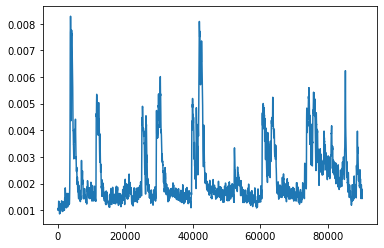

In [23]:
data_in = pd.read_pickle(f"{PROJECT_PATH}/data/behavior/pupil/spontaneous/pupil_area_766640955.pkl")
behavior_series = data_in.analogsignals[4]

plt.plot(behavior_series);

In [20]:
# a lot bad sessions without above epochs

In [27]:
# settings for testing
THRESHOLD = 0
MIN_GAP = 5
MIN_DURATION = 30
PF = 50

In [28]:
# look at diffs

for session in session_ids:
    print(f"\nAnalyzing session: \t{session}")
    
    if not os.path.exists(f"{PROJECT_PATH}/data/behavior/pupil/spontaneous/pupil_area_{session}.pkl"):
        continue

    # load data
    data_in = pd.read_pickle(f"{PROJECT_PATH}/data/behavior/pupil/spontaneous/pupil_area_{session}.pkl")
    behavior_series = data_in.analogsignals[4]
    above_epochs, below_epochs = get_epoch_times(np.diff(behavior_series.magnitude.T[0]), 
                                                 THRESHOLD, MIN_GAP, MIN_DURATION, RF)
    
    above_epochs += float(behavior_series.t_start)
    below_epochs += float(behavior_series.t_start)
    above_epochs = np.array(split_epochs(above_epochs, MIN_DURATION))
    below_epochs = np.array(split_epochs(below_epochs, MIN_DURATION))
    
    print(f"\nAbove Epochs: {len(above_epochs)}\tBelow Epochs: {len(below_epochs)}\n")


Analyzing session: 	766640955
Identified 2152 epochs
Joined 2146 / 2152 epochs
Dropped 0 / 6 epochs
Dropped 5 / 5 epochs

Above Epochs: 57	Below Epochs: 0


Analyzing session: 	767871931
Identified 4225 epochs
Joined 4220 / 4225 epochs
Dropped 0 / 5 epochs
Dropped 4 / 4 epochs

Above Epochs: 57	Below Epochs: 0


Analyzing session: 	768515987

Analyzing session: 	771160300
Identified 1945 epochs
Joined 1930 / 1945 epochs
Dropped 8 / 15 epochs
Dropped 4 / 7 epochs

Above Epochs: 50	Below Epochs: 4


Analyzing session: 	771990200
Identified 2533 epochs
Joined 2518 / 2533 epochs
Dropped 3 / 15 epochs
Dropped 11 / 11 epochs

Above Epochs: 52	Below Epochs: 0


Analyzing session: 	774875821
Identified 2714 epochs
Joined 2702 / 2714 epochs
Dropped 4 / 12 epochs
Dropped 7 / 8 epochs

Above Epochs: 53	Below Epochs: 1


Analyzing session: 	778240327
Identified 4059 epochs
Joined 4052 / 4059 epochs
Dropped 1 / 7 epochs
Dropped 5 / 5 epochs

Above Epochs: 57	Below Epochs: 0


Analyzing session: 	7

In [29]:
# a lot of above epochs

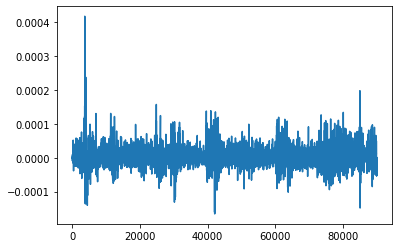

In [25]:
data_in = pd.read_pickle(f"{PROJECT_PATH}/data/behavior/pupil/spontaneous/pupil_area_766640955.pkl")
behavior_series = np.diff(data_in.analogsignals[4].magnitude.T[0])

plt.plot(behavior_series);

In [26]:
# maybe smooth this more for some better results